# This dataset provides information about the telecommunication activity over the city of Milano ( Telecommunications - SMS, Call, Internet  )


### after prepared we the environnement ( python 3 , Jupyter notebook ) first of all that we need is to install the necessary packages like pandas , numpy ...

 * pandas can be installed via pip from PyPI  (pip install pandas) and the same whay for numpy and matplotlib ... 

In [3]:
import pandas as pd
import numpy as np 
from datetime import datetime as dt
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns

### Create a DataFrame with data file names placed under directory  "01_11_2013---07_11_2013" with extension .txt

In [4]:
# glob  is used to return all file paths that match a specific pattern.
filespath = glob("C:\\Users\\a.abdallah\\Desktop\\Telecommuniction-Data\\01_11_2013---07_11_2013\\*.txt" )

#Set the column names for the data read
col_list = ['gridID', 'timeInterval', 'countryCode', 'smsIn', 'smsOut', 'callIn', 'callOut', 'internet']

#Initialize an empty dataframe
data = pd.DataFrame()
#Read file into Pandas DataFrame          
data = pd.concat((pd.read_csv(file, sep='\t',header=None, names=col_list, parse_dates=True) for file in filespath), ignore_index=True)

data

  

,gridID,timeInterval,countryCode,smsIn,smsOut,callIn,callOut,internet
0,1,1383260400000,0,0.081363,NaN,NaN,NaN,NaN
1,1,1383260400000,39,0.141864,0.156787,0.160938,0.052275,11.028366
2,1,1383261000000,0,0.136588,NaN,NaN,0.027300,NaN
3,1,1383261000000,33,NaN,NaN,NaN,NaN,0.026137
4,1,1383261000000,39,0.278452,0.119926,0.188777,0.133637,11.100963
...,...,...,...,...,...,...,...,...
37622893,9999,1383864000000,39,0.914131,1.428025,0.669794,NaN,17.813618
37622894,9999,1383864600000,0,0.092566,NaN,NaN,0.088767,NaN
37622895,9999,1383864600000,216,0.288963,NaN,NaN,NaN,NaN
37622896,9999,1383864600000,221,0.171990,NaN,NaN,0.085995,NaN


In [ ]:
data.tail(10)


### Convert timeInterval column which has Epoch timestamps to UTC and then convert to Milan's local timezone and save it to column startTime

* data ['timeInterval'] is a column in our DataFrame that contains epoch timestamps (the number of seconds or milliseconds since January 1, 1970). To convert these epoch timestamps to human-readable dates and times, we're using the pd.to_datetime() function from the pandas library.

* unit='ms' specifies that the epoch timestamps are in milliseconds (as opposed to seconds or some other unit of time).

* utc=True specifies that the epoch timestamps are in Coordinated Universal Time (UTC), which is a standard time zone used as a reference point around the world.

==> This will return a pandas Series of datetime objects in UTC timezone.

* The next step is to convert these UTC datetimes to the local timezone of Milan (Central European Time or CET). To do this, we can use the dt.tz_convert() method of the pandas Series to convert the timezone to CET.

* Finally, we want to remove the timezone information from the datetime objects, so that they are in local time format instead of "UTC+1:00" format. To do this, we can use the dt.tz_localize(None) method of the pandas Series.

==> This will convert the Series of datetimes to Milan's local timezone and remove the timezone information, so that the datetime objects are in the format YYYY-MM-DD HH:MM:SS. Finally, we can save this Series to a new column in our DataFrame called startTime.


In [5]:
#tz_localize(None) returns local time format instead of "UTC+1:00" format
data['startTime'] = pd.to_datetime(data.timeInterval, unit='ms', utc=True).dt.tz_convert('CET').dt.tz_localize(None)

# create new columns 
data['Date'] = data['startTime'].dt.date
data['Time'] = data['startTime'].dt.time
data['hour'] = data['startTime'].dt.hour

#Drop timeInterval & startTime columns

data.drop(columns={'timeInterval' , 'startTime'},inplace=True)

#replace the NaN values with 0 
data.fillna(0,inplace = True)
data

,gridID,countryCode,smsIn,smsOut,callIn,callOut,internet,Date,Time,hour
0,1,0,0.081363,0.000000,0.000000,0.000000,0.000000,2013-11-01,00:00:00,0
1,1,39,0.141864,0.156787,0.160938,0.052275,11.028366,2013-11-01,00:00:00,0
2,1,0,0.136588,0.000000,0.000000,0.027300,0.000000,2013-11-01,00:10:00,0
3,1,33,0.000000,0.000000,0.000000,0.000000,0.026137,2013-11-01,00:10:00,0
4,1,39,0.278452,0.119926,0.188777,0.133637,11.100963,2013-11-01,00:10:00,0
...,...,...,...,...,...,...,...,...,...,...
37622893,9999,39,0.914131,1.428025,0.669794,0.000000,17.813618,2013-11-07,23:40:00,23
37622894,9999,0,0.092566,0.000000,0.000000,0.088767,0.000000,2013-11-07,23:50:00,23
37622895,9999,216,0.288963,0.000000,0.000000,0.000000,0.000000,2013-11-07,23:50:00,23
37622896,9999,221,0.171990,0.000000,0.000000,0.085995,0.000000,2013-11-07,23:50:00,23


In [ ]:
# The isnull() function is used to detect missing values for an array-like object and returns: bool or array-like of bool
#(Replace all values in the DataFrame with True for NULL values, otherwise False)
#we count the NaN values by using function sum()
data.isnull().sum()

In [6]:
# make a copy from data
data1 = data.copy()



# to replace the NaN values with 0 we use fillna fucntion
data1.fillna(0,inplace = True)
data1

,gridID,countryCode,smsIn,smsOut,callIn,callOut,internet,Date,Time,hour
0,1,0,0.081363,0.000000,0.000000,0.000000,0.000000,2013-11-01,00:00:00,0
1,1,39,0.141864,0.156787,0.160938,0.052275,11.028366,2013-11-01,00:00:00,0
2,1,0,0.136588,0.000000,0.000000,0.027300,0.000000,2013-11-01,00:10:00,0
3,1,33,0.000000,0.000000,0.000000,0.000000,0.026137,2013-11-01,00:10:00,0
4,1,39,0.278452,0.119926,0.188777,0.133637,11.100963,2013-11-01,00:10:00,0
...,...,...,...,...,...,...,...,...,...,...
37622893,9999,39,0.914131,1.428025,0.669794,0.000000,17.813618,2013-11-07,23:40:00,23
37622894,9999,0,0.092566,0.000000,0.000000,0.088767,0.000000,2013-11-07,23:50:00,23
37622895,9999,216,0.288963,0.000000,0.000000,0.000000,0.000000,2013-11-07,23:50:00,23
37622896,9999,221,0.171990,0.000000,0.000000,0.085995,0.000000,2013-11-07,23:50:00,23


In [ ]:
data1.isnull().sum()

### Generate the totals for SMS and CALL 


In [7]:

data1['SMS_Total'] = data1['smsIn'] + data1['smsOut']
data1['CALL_Total'] = data1['callIn'] + data1['callOut']

#Drop smsIn , smsOut , callIn and callOut columns
data1.drop(columns={'smsIn',"smsOut","callIn","callOut"},inplace=True)
data1

,gridID,countryCode,internet,Date,Time,hour,SMS_Total,CALL_Total
0,1,0,0.000000,2013-11-01,00:00:00,0,0.081363,0.000000
1,1,39,11.028366,2013-11-01,00:00:00,0,0.298651,0.213213
2,1,0,0.000000,2013-11-01,00:10:00,0,0.136588,0.027300
3,1,33,0.026137,2013-11-01,00:10:00,0,0.000000,0.000000
4,1,39,11.100963,2013-11-01,00:10:00,0,0.398378,0.322415
...,...,...,...,...,...,...,...,...
37622893,9999,39,17.813618,2013-11-07,23:40:00,23,2.342156,0.669794
37622894,9999,0,0.000000,2013-11-07,23:50:00,23,0.092566,0.088767
37622895,9999,216,0.000000,2013-11-07,23:50:00,23,0.288963,0.000000
37622896,9999,221,0.000000,2013-11-07,23:50:00,23,0.171990,0.085995


C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15508\2246898758.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


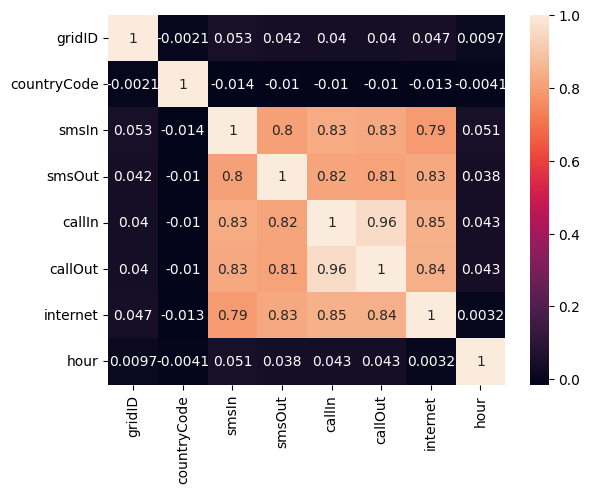

In [6]:
sns.heatmap(data.corr(),annot=True)
plt.show()

### to optisme our code we need to create a function called group_by and take 3 paramatres (the data , list of column that you want to groupe the data by it , collecttion contains the name of columns that you want to drop it) and  return a DataFrame  

In [8]:
#set an empty list
column =[]
# set an empty collection , in Python curly braces {} are used to define a dictionary data type,
# which is an unordered collection of key-value pairs. in this examples there is no key_value and no partcular order .
drop ={}
def group_by(data_name,column,drop):
    df = pd.DataFrame()
    
    #A groupby operation involves some combination of splitting the object, applying a function, and combining the results.
    df = data_name.groupby(column).sum()
    df.drop(columns=drop,inplace=True)
    return (df)
   
    

### Group the data by Day

In [8]:
group_by_day = group_by(data,['Date'],{'countryCode','gridID','hour'})
group_by_day

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15508\858627787.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data_name.groupby(column).sum()


,smsIn,smsOut,callIn,callOut,internet
Date,,,,,
2013-11-01,4.606387e+06,2.822430e+06,2.622800e+06,3.196762e+06,8.247925e+07
2013-11-02,4.750040e+06,2.805884e+06,2.835599e+06,3.413080e+06,8.099102e+07
2013-11-03,4.378162e+06,2.782035e+06,2.285274e+06,2.806807e+06,8.350916e+07
2013-11-04,7.742700e+06,4.288716e+06,5.409634e+06,6.166560e+06,1.081069e+08
2013-11-05,7.931791e+06,4.368527e+06,5.692466e+06,6.476255e+06,1.111241e+08
2013-11-06,7.947298e+06,4.351455e+06,5.702409e+06,6.340527e+06,1.110092e+08
2013-11-07,8.144554e+06,4.286852e+06,5.648970e+06,6.231774e+06,1.103965e+08


In [23]:
group_by_day2 = group_by(data1,['Date'],{'countryCode','gridID','hour'})
group_by_day2

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15508\858627787.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data_name.groupby(column).sum()


,internet,SMS_Total,CALL_Total
Date,,,
2013-11-01,8.247925e+07,7.428817e+06,5.819562e+06
2013-11-02,8.099102e+07,7.555923e+06,6.248679e+06
2013-11-03,8.350916e+07,7.160196e+06,5.092081e+06
2013-11-04,1.081069e+08,1.203142e+07,1.157619e+07
2013-11-05,1.111241e+08,1.230032e+07,1.216872e+07
2013-11-06,1.110092e+08,1.229875e+07,1.204294e+07
2013-11-07,1.103965e+08,1.243141e+07,1.188074e+07


### plot of SMS_IN , SMS_OUT & Call_IN , CALL_OUT activities by day

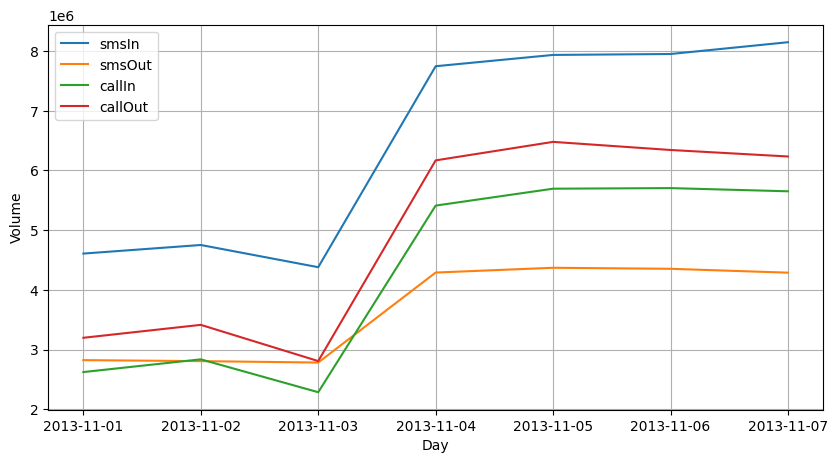

'  \ngroup_by_day[\'smsIn\'].plot(ax=ax, label=\'smsIn\')\ngroup_by_day[\'smsOut\'].plot(ax=ax, label=\'smsOut\')\ngroup_by_day[\'callIn\'].plot(ax=ax, label=\'callIn\')\ngroup_by_day[\'callOut\'].plot(ax=ax, label=\'callOut\')\n\nax.grid()\nax.set_xlabel("Day")\nax.set_ylabel("Volume")\nax.legend()\n\nplt.show()\n'

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))

for column in group_by_day.columns[:-1]:
    group_by_day[column].plot(ax=ax, label=column)
    
ax.grid()
ax.set_xlabel("Day")
ax.set_ylabel("Volume")
ax.legend()
plt.show()


'''  
group_by_day['smsIn'].plot(ax=ax, label='smsIn')
group_by_day['smsOut'].plot(ax=ax, label='smsOut')
group_by_day['callIn'].plot(ax=ax, label='callIn')
group_by_day['callOut'].plot(ax=ax, label='callOut')

ax.grid()
ax.set_xlabel("Day")
ax.set_ylabel("Volume")
ax.legend()

plt.show()
'''



### Sort days by total volumes of SMS, Call & Internet activities

In [ ]:

#SMS_by_day = group_by_day[['SMS_Total']].sort_values(by = 'SMS_Total' , ascending = True)
#CALL_by_day = group_by_day[['CALL_Total']].sort_values(by = 'CALL_Total' , ascending = True)
#INTERNET_by_day = group_by_day[['internet']].sort_values(by = 'internet' , ascending = True)


### plot of SMS_Total , Call_Total & Internet activities by day using line chart

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15508\4056857589.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[idx].set_xticklabels(group_by_day2.index, rotation=75)
C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15508\4056857589.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[idx].set_xticklabels(group_by_day2.index, rotation=75)
C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15508\4056857589.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[idx].set_xticklabels(group_by_day2.index, rotation=75)


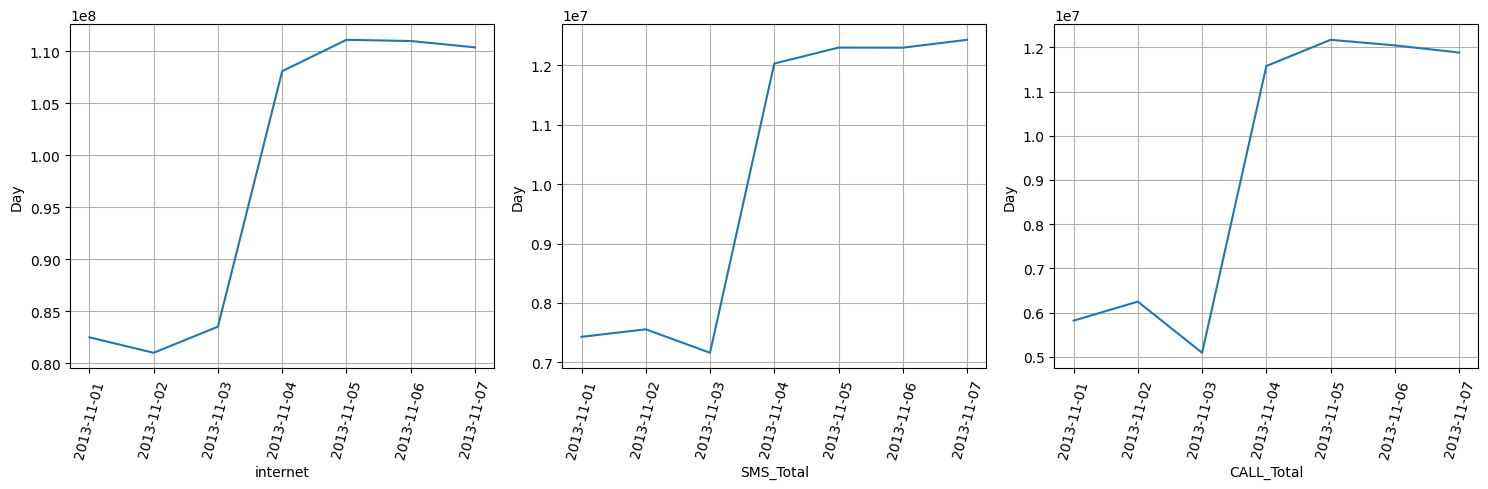

'\ngroup_by_day2[\'SMS_Total\'].plot( ax=axs[0])\n\naxs[0].set_xlabel("SMS Volume")\naxs[0].set_ylabel("Day")\naxs[0].set_xticklabels(group_by_day2.index, rotation=75)\naxs[0].grid()\ngroup_by_day2[\'CALL_Total\'].plot( ax=axs[1])\n\naxs[1].set_xlabel("CALL Volume")\naxs[1].set_ylabel("Day")\naxs[1].set_xticklabels(group_by_day2.index, rotation=75)\naxs[1].grid()\ngroup_by_day2[\'internet\'].plot( ax=axs[2])\n\naxs[2].set_xlabel("Internet Volume")\naxs[2].set_ylabel("Day")\naxs[2].set_xticklabels(group_by_day2.index, rotation=75)\naxs[2].grid()\n\n'

In [24]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# enumerate() is a built-in Python function that takes an iterable (a list, tuple, or any other sequence) 
# and returns an iterator that generates tuples containing both the index and the item at that index.

for idx,column in enumerate(group_by_day2.columns):
    group_by_day2[column].plot( ax=axs[idx])
    axs[idx].set_xlabel(column)
    axs[idx].set_ylabel("Day")
    axs[idx].set_xticklabels(group_by_day2.index, rotation=75)
    axs[idx].grid()


plt.xticks(rotation = 75)
plt.tight_layout()
plt.show()

'''
group_by_day2['SMS_Total'].plot( ax=axs[0])

axs[0].set_xlabel("SMS Volume")
axs[0].set_ylabel("Day")
axs[0].set_xticklabels(group_by_day2.index, rotation=75)
axs[0].grid()
group_by_day2['CALL_Total'].plot( ax=axs[1])

axs[1].set_xlabel("CALL Volume")
axs[1].set_ylabel("Day")
axs[1].set_xticklabels(group_by_day2.index, rotation=75)
axs[1].grid()
group_by_day2['internet'].plot( ax=axs[2])

axs[2].set_xlabel("Internet Volume")
axs[2].set_ylabel("Day")
axs[2].set_xticklabels(group_by_day2.index, rotation=75)
axs[2].grid()

'''

### plot of SMS_IN , SMS_OUT & Call_IN , CALL_OUT activities by Hour using line chart

In [14]:
group_by_hour = group_by(data,['hour'],{'gridID','countryCode'})

#group_by_hour.reset_index(inplace=True)
group_by_hour

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_8880\858627787.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data_name.groupby(column).sum()


,smsIn,smsOut,callIn,callOut,internet
hour,,,,,
0,6.052820e+05,5.555044e+05,1.797632e+05,2.290948e+05,2.348885e+07
1,3.139912e+05,3.324220e+05,8.976319e+04,1.228706e+05,1.956353e+07
2,1.928273e+05,2.414595e+05,5.394730e+04,8.120553e+04,1.686377e+07
3,1.379072e+05,2.056120e+05,3.847290e+04,6.822410e+04,1.506482e+07
4,1.185341e+05,1.902678e+05,3.801372e+04,6.564112e+04,1.402213e+07
5,1.312604e+05,1.992546e+05,4.776854e+04,7.641638e+04,1.388156e+07
6,2.602220e+05,3.028265e+05,1.089364e+05,1.567041e+05,1.561721e+07
7,8.258802e+05,7.097681e+05,4.266653e+05,5.506025e+05,2.154565e+07
8,2.519444e+06,1.187291e+06,1.193614e+06,1.444437e+06,2.816011e+07


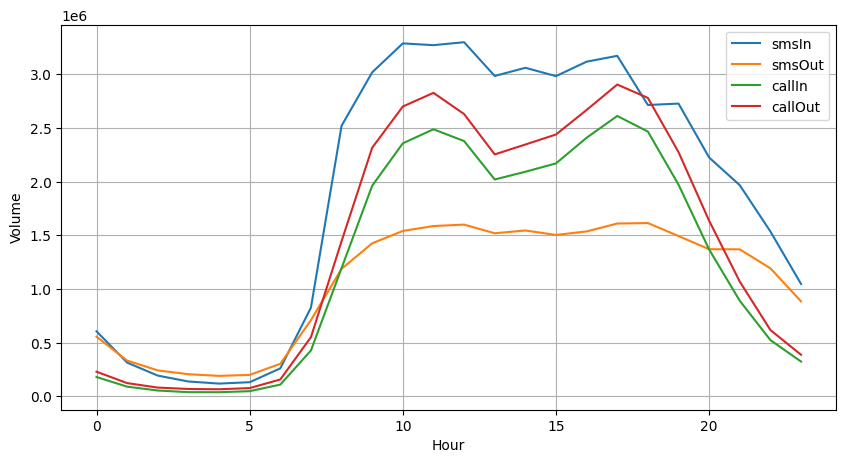

"\n    group_by_hour['smsIn'].plot(ax=ax, label='smsIn')\ngroup_by_hour['smsOut'].plot(ax=ax, label='smsOut')\ngroup_by_hour['callIn'].plot(ax=ax, label='callIn')\ngroup_by_hour['callOut'].plot(ax=ax, label='callOut')\n\n"

In [30]:
    fig, ax = plt.subplots(figsize=(10, 5))

    for column in group_by_hour.columns[:-1]:
        group_by_hour[column].plot(ax=ax, label=column)


    ax.grid()
    ax.set_xlabel("Hour")
    ax.set_ylabel("Volume")
    ax.legend()

    plt.show()
    
    '''
        group_by_hour['smsIn'].plot(ax=ax, label='smsIn')
    group_by_hour['smsOut'].plot(ax=ax, label='smsOut')
    group_by_hour['callIn'].plot(ax=ax, label='callIn')
    group_by_hour['callOut'].plot(ax=ax, label='callOut')
    
    '''


### Group the data by Hour

In [32]:

group_by_Hour = pd.DataFrame()


group_by_Hour = group_by(data1,['hour'],{'countryCode','gridID'})

group_by_Hour 

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15508\858627787.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data_name.groupby(column).sum()


,internet,SMS_Total,CALL_Total
hour,,,
0,2.348885e+07,1.160786e+06,4.088581e+05
1,1.956353e+07,6.464133e+05,2.126338e+05
2,1.686377e+07,4.342868e+05,1.351528e+05
3,1.506482e+07,3.435192e+05,1.066970e+05
4,1.402213e+07,3.088019e+05,1.036548e+05
5,1.388156e+07,3.305150e+05,1.241849e+05
6,1.561721e+07,5.630484e+05,2.656405e+05
7,2.154565e+07,1.535648e+06,9.772678e+05
8,2.816011e+07,3.706735e+06,2.638051e+06


### plot the activity total by hour using bar chart

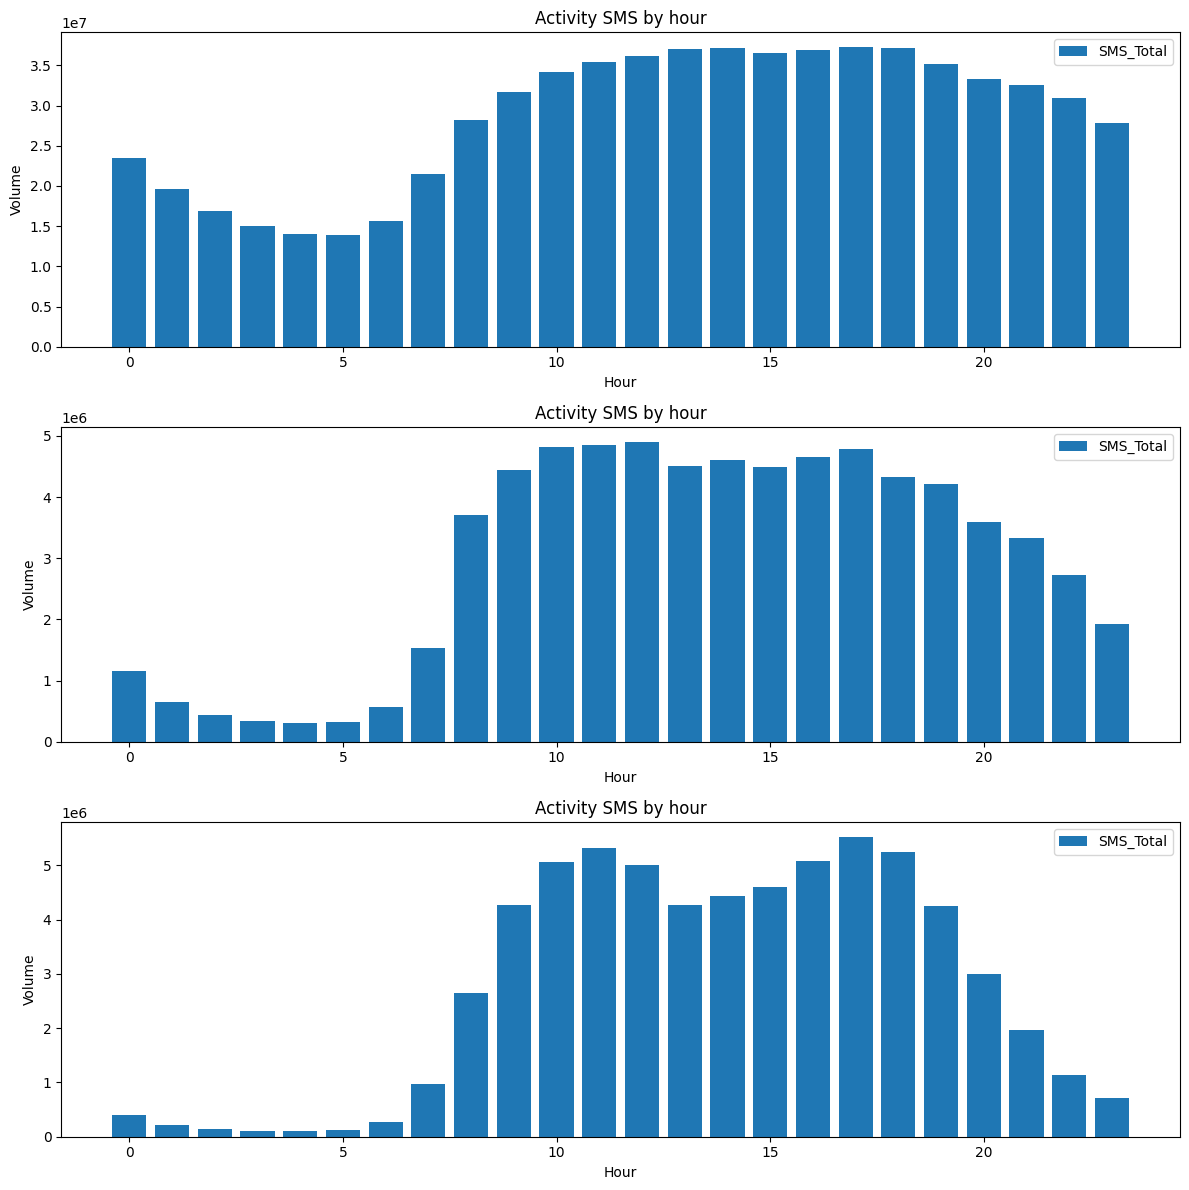

'\n\naxs[0].bar(group_by_Hour.index, group_by_Hour[\'SMS_Total\'], label=\'SMS_Total\')\naxs[0].set_title("Activity SMS by hour")\naxs[0].set_xlabel("Hour")\naxs[0].set_ylabel("Volume")\naxs[0].legend()\n\naxs[1].bar(group_by_Hour.index, group_by_Hour[\'CALL_Total\'], label=\'CALL_Total\')\naxs[1].set_title("Activity CALL by hour")\naxs[1].set_xlabel("Hour")\naxs[1].set_ylabel("Volume")\naxs[1].legend()\n\n\naxs[2].bar(group_by_Hour.index, group_by_Hour[\'internet\'], label=\'internet\')\naxs[2].set_title("Activity Internet by hour")\naxs[2].set_xlabel("Hour")\naxs[2].set_ylabel("Volume")\naxs[2].legend()\n'

In [33]:



fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))

for idx,column in enumerate(group_by_Hour.columns):

    axs[idx].bar(group_by_Hour.index, group_by_Hour[column], label='SMS_Total')
    axs[idx].set_title("Activity SMS by hour")
    axs[idx].set_xlabel("Hour")
    axs[idx].set_ylabel("Volume")
    axs[idx].legend()
    


plt.tight_layout()
plt.show()

'''

axs[0].bar(group_by_Hour.index, group_by_Hour['SMS_Total'], label='SMS_Total')
axs[0].set_title("Activity SMS by hour")
axs[0].set_xlabel("Hour")
axs[0].set_ylabel("Volume")
axs[0].legend()

axs[1].bar(group_by_Hour.index, group_by_Hour['CALL_Total'], label='CALL_Total')
axs[1].set_title("Activity CALL by hour")
axs[1].set_xlabel("Hour")
axs[1].set_ylabel("Volume")
axs[1].legend()


axs[2].bar(group_by_Hour.index, group_by_Hour['internet'], label='internet')
axs[2].set_title("Activity Internet by hour")
axs[2].set_xlabel("Hour")
axs[2].set_ylabel("Volume")
axs[2].legend()
'''



### group the activity by day and by hour

In [34]:
#group_by_day_by_hour = group_by(data,['Date','hour'],{'countryCode','gridID'})
#group_by_day_by_hour.reset_index(inplace=True)
group_by_day_by_hour

,Date,hour,smsIn,smsOut,callIn,callOut,internet
0,2013-11-01,0,122133.937438,99854.500391,46430.908863,54806.248315,3.623713e+06
1,2013-11-01,1,78865.249034,72349.680802,26904.141956,34178.043675,3.087452e+06
2,2013-11-01,2,56241.202155,53626.620764,18588.392375,24601.607427,2.668823e+06
3,2013-11-01,3,42279.171870,46501.954632,13227.274446,20151.556831,2.366074e+06
4,2013-11-01,4,30291.692765,38776.742872,10220.831944,16239.305141,2.158129e+06
...,...,...,...,...,...,...,...
163,2013-11-07,19,470057.404683,245385.649189,355738.668325,399899.535646,5.556072e+06
164,2013-11-07,20,373900.573214,220579.500957,240698.981536,278313.992112,5.151144e+06
165,2013-11-07,21,328942.903664,217627.630527,150259.503300,176615.453562,4.924813e+06
166,2013-11-07,22,233627.218168,184462.187496,84420.561715,96245.431150,4.622740e+06


### plot the activity for each day by hour using heatmap

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15508\2136099275.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = group_by_day_by_hour.pivot('Date', 'hour', activity)
C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15508\2136099275.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = group_by_day_by_hour.pivot('Date', 'hour', activity)
C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15508\2136099275.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = group_by_day_by_hour.pivot('Date', 'hour', activity)
C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15508\2136099275.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = group_by_day_by_hour.pivot('Date', 'hour', activity)
C:\Users\a.abdallah\AppData\Loca

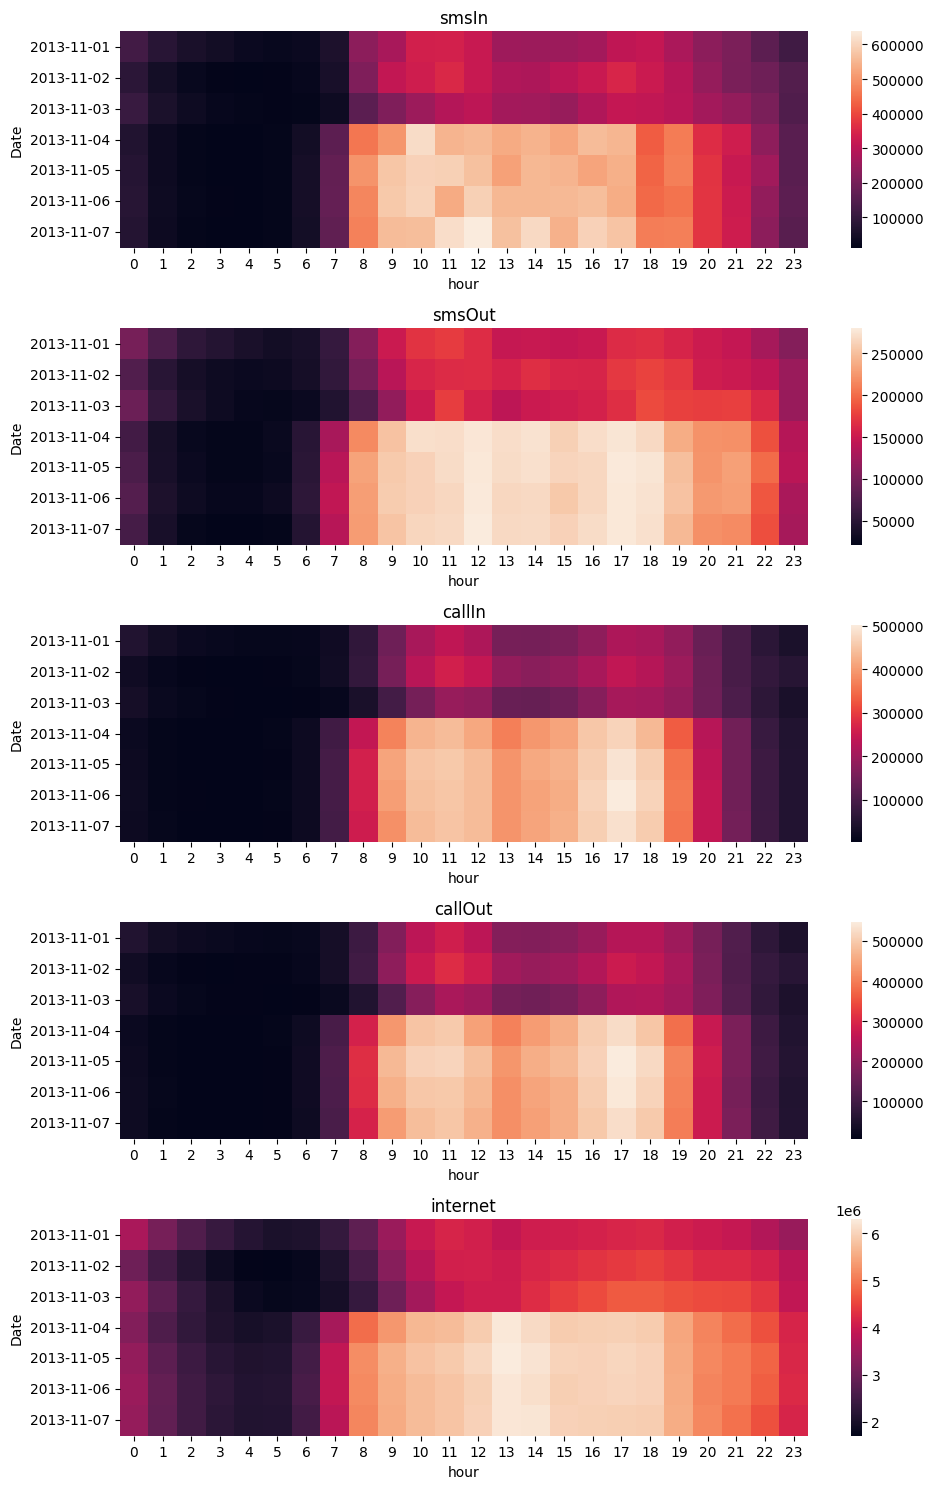

In [35]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(10, 15))

# Loop over activities and plot data for each activity
for idx, activity in enumerate(['smsIn', 'smsOut', 'callIn', 'callOut', 'internet']): # group_by_grid_by_day2
    
    
    
    

    # Create pivot table and plot heatmap
    pivot_table = group_by_day_by_hour.pivot('Date', 'hour', activity)
    sns.heatmap(pivot_table, ax=ax[idx])

    # Set title for subplot
    ax[idx].set_title(activity)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.tight_layout()
# Show plot
plt.show()


 ### Group the data by gridID 

In [10]:

group_by_grid = group_by(data1,['gridID'],{'countryCode','hour'})

group_by_grid 


C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_8880\858627787.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data_name.groupby(column).sum()


,internet,SMS_Total,CALL_Total
gridID,,,
1,10161.346877,972.462400,823.050729
2,10206.621484,986.751514,835.800917
3,10254.814512,1001.961711,849.372988
4,10030.208162,931.073724,786.119580
5,9155.531808,867.856045,735.981329
...,...,...,...
9996,37581.639821,3183.956405,3024.765487
9997,41170.661609,3441.599035,3288.669089
9998,40483.931843,3383.343540,3230.625098


In [46]:
#Create new dataFrame name data grid contains only the total sms and call for each grid
data_grid =  group_by_grid[['SMS_Total','CALL_Total']].sort_values(by = 'SMS_Total' , ascending = False)

data_grid

,SMS_Total,CALL_Total
gridID,,
5059,188800.334442,163262.384389
5161,154553.655954,120522.068039
6064,142061.943190,135993.525222
5061,138377.177504,105578.459040
5159,130823.665091,119592.578889
...,...,...
1207,65.220136,52.071944
112,61.556434,54.780694
2801,24.376618,24.827522


### Plot top 10 grids and its volume for SMS and CALL activity total and comparison between them

<AxesSubplot: xlabel='gridID'>

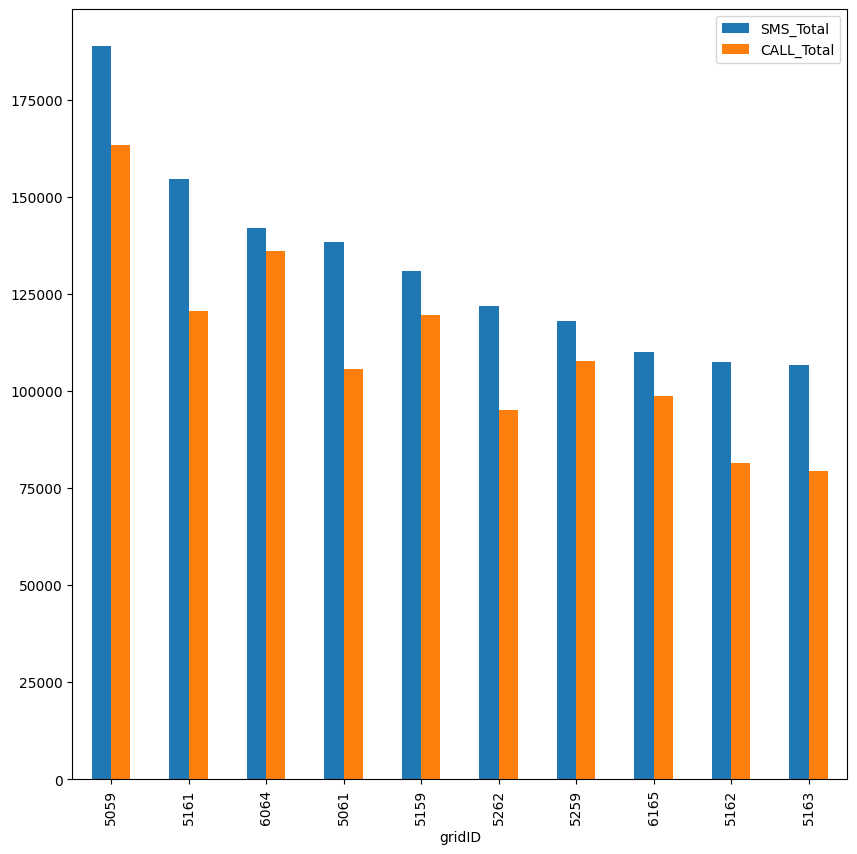

In [47]:

data_grid[:10].plot(kind="bar" , figsize=(10,10))


### Plot top 10 grids and its volume for Internet activity

Text(0, 0.5, ' gridId')

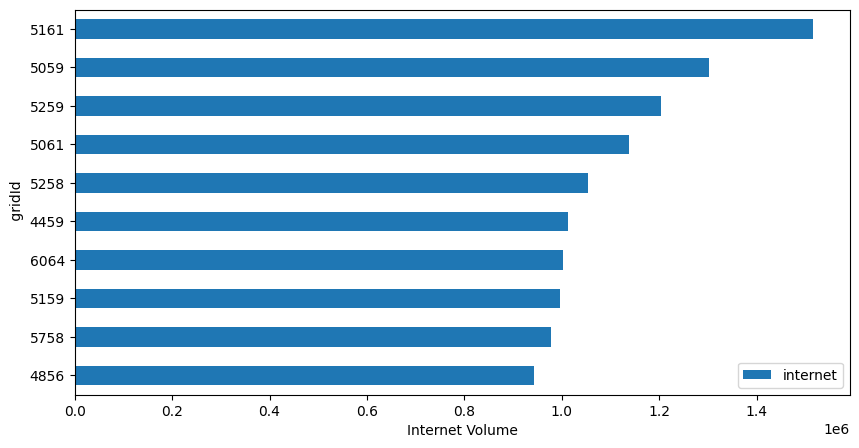

In [48]:

#Create new dataFrame name data grid contains only the total sms and call for each grid
Internet_activity_by_grid =  group_by_grid[['internet']].sort_values(by = 'internet' , ascending = False)

ax =Internet_activity_by_grid[:10].plot(kind='barh', figsize=(10,5))
ax.invert_yaxis()
ax.set_xlabel("Internet Volume")
ax.set_ylabel(" gridId")


### Group the activity total by gridID and Day


In [49]:
group_by_grid_by_day = group_by(data1,['gridID','Date'],{'countryCode','hour'})


group_by_grid_by_day

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15508\858627787.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data_name.groupby(column).sum()


internet   SMS_Total  CALL_Total
gridID Date                                           
1      2013-11-01  1507.048349  124.596325   89.353945
       2013-11-02  1515.641856  130.291756  101.481653
       2013-11-03  1533.148425  123.175072   77.051861
       2013-11-04  1404.813593  159.614824  138.297882
       2013-11-05  1518.090111  144.032134  139.501434
...                        ...         ...         ...
10000  2013-11-03  2716.099257  268.427403  190.423018
       2013-11-04  3069.209086  354.254727  383.135633
       2013-11-05  2881.612204  359.679285  384.331729
       2013-11-06  2971.410253  361.879012  393.260134
       2013-11-07  3035.727638  324.793118  357.358754

[70000 rows x 3 columns]

### Group the activity  by gridID and Day

In [53]:
group_by_grid_by_day2 = group_by(data,['gridID','Date'],{'countryCode','hour'})

group_by_grid_by_day2

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15508\858627787.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data_name.groupby(column).sum()


smsIn      smsOut      callIn     callOut     internet
gridID Date                                                                   
1      2013-11-01   78.709755   45.886570   41.108567   48.245378  1507.048349
       2013-11-02   86.415810   43.875946   47.891016   53.590637  1515.641856
       2013-11-03   77.728292   45.446780   36.145436   40.906425  1533.148425
       2013-11-04  104.793806   54.821018   67.898464   70.399418  1404.813593
       2013-11-05   97.425105   46.607029   68.735213   70.766221  1518.090111
...                       ...         ...         ...         ...          ...
10000  2013-11-03  151.314860  117.112544   88.162068  102.260950  2716.099257
       2013-11-04  237.305787  116.948939  188.550832  194.584801  3069.209086
       2013-11-05  217.906827  141.772458  179.591614  204.740115  2881.612204
       2013-11-06  212.373992  149.505020  189.152721  204.107412  2971.410253
       2013-11-07  222.335642  102.457476  173.211759  184.146995  3035.727638

[70000 rows x 5 columns]

In [11]:
#groupe the activity by grid
group_by_grid2= group_by(data,['gridID'],{'countryCode','hour'})

group_by_grid2 

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_8880\858627787.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data_name.groupby(column).sum()


,smsIn,smsOut,callIn,callOut,internet
gridID,,,,,
1,639.261690,333.200710,398.110222,424.940507,10161.346877
2,649.052684,337.698831,404.025526,431.775391,10206.621484
3,659.474809,342.486902,410.322132,439.050855,10254.814512
4,610.901901,320.171823,380.976439,405.143141,10030.208162
5,569.583077,298.272968,356.464539,379.516790,9155.531808
...,...,...,...,...,...
9996,2068.397167,1115.559238,1425.650976,1599.114511,37581.639821
9997,2272.280097,1169.318937,1542.878171,1745.790918,41170.661609
9998,2227.572293,1155.771247,1517.018822,1713.606276,40483.931843


### Sorted the grid and display them

In [55]:

smsIn = group_by_grid2[['smsIn']].sort_values(by = 'smsIn' , ascending = False)
smsOut = group_by_grid2[['smsOut']].sort_values(by = 'smsOut' , ascending = False)
callIn = group_by_grid2[['callIn']].sort_values(by = 'callIn' , ascending = False)
callOut = group_by_grid2[['callOut']].sort_values(by = 'callOut' , ascending = False)
internet = group_by_grid2[['internet']].sort_values(by = 'internet' , ascending = False)



smsIn

,smsIn
gridID,
5059,127028.614843
5161,111475.820422
6064,100563.749045
5061,93629.587055
5159,87638.044994
...,...
1207,41.446876
112,40.494094
2801,16.531998


### take a top 10 grid for each activity

In [56]:
top10_grid_Activity =pd.DataFrame()
top10_grid_Activity['smsIn'] = smsIn[:10].index.values
top10_grid_Activity['smsOut'] = smsOut[:10].index.values
top10_grid_Activity['callIn'] = callIn[:10].index.values
top10_grid_Activity['callOut'] = callOut[:10].index.values
top10_grid_Activity['internet'] = internet[:10].index.values
top10_grid_Activity

,smsIn,smsOut,callIn,callOut,internet
0,5059,5059,5059,5059,5161
1,5161,4874,6064,6064,5059
2,6064,5061,5159,5161,5259
3,5061,5349,5161,5159,5061
4,5159,4972,5259,6072,5258
5,5262,5159,5061,6165,4459
6,5259,5161,6072,5061,6064
7,6165,5259,5258,5259,5159
8,5162,5262,5262,6058,5758
9,6058,6064,6058,5262,4856


### plot the activity for each activity (smsin,smsout,callin,callout) for the top 10 grid on each day

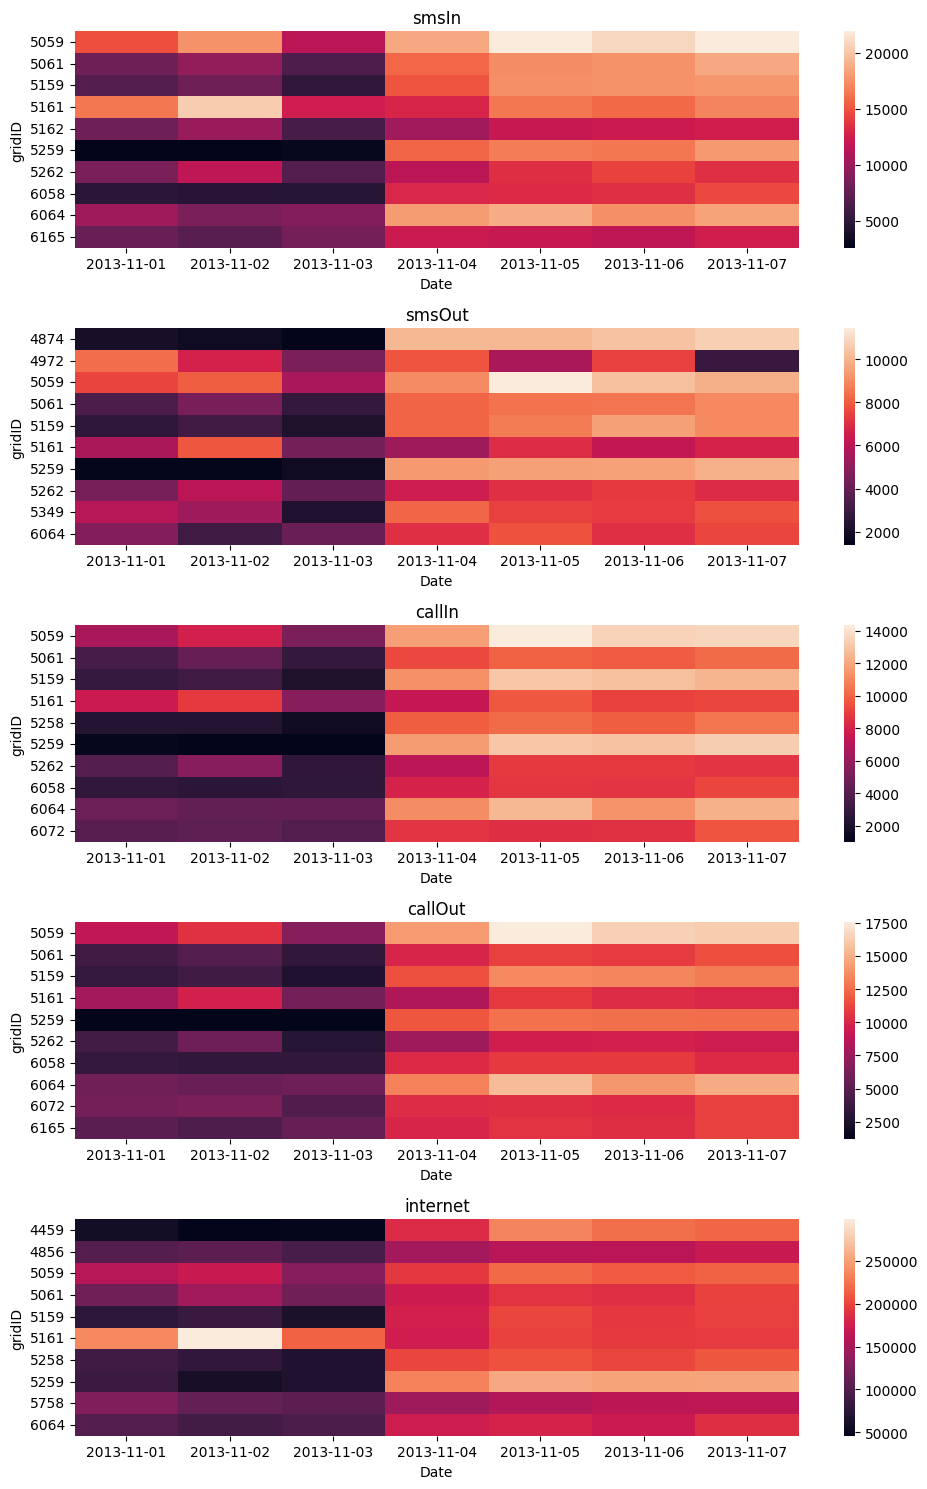

In [57]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(10, 15))

# Loop over activities and plot data for each activity
for idx, activity in enumerate(['smsIn', 'smsOut', 'callIn', 'callOut', 'internet']): # group_by_grid_by_day2
    
    # Get top 10 grid cells for specific activity
    top10 = top10_grid_Activity[activity]
    
    # Get data for specific activity and top 10 grid cells
    activity_data = group_by_grid_by_day2.loc[top10][[activity]]
    activity_data.reset_index(inplace=True)

    # Create pivot table and plot heatmap
    pivot_table = activity_data.pivot(index='gridID', columns='Date', values=activity)
    sns.heatmap(pivot_table, ax=ax[idx])

    # Set title for subplot
    ax[idx].set_title(activity)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.tight_layout()
# Show plot
plt.show()

### get the volums of sms , call and internet for the gridID = 5059

In [50]:

data_5059 = group_by_grid_by_day.loc[5059][['SMS_Total','CALL_Total']]


data_5059

,SMS_Total,CALL_Total
Date,,
2013-11-01,22296.937848,15522.635482
2013-11-02,25584.356419,18481.270475
2013-11-03,17038.619060,11933.295541
2013-11-04,27584.158564,25878.432346
2013-11-05,33338.926189,31859.920064
2013-11-06,31164.758363,29825.994028
2013-11-07,31792.577999,29760.836453


### Plot SMS , CALL activity comparison on each day for gridID = 5059 ( line chart , bar chart)

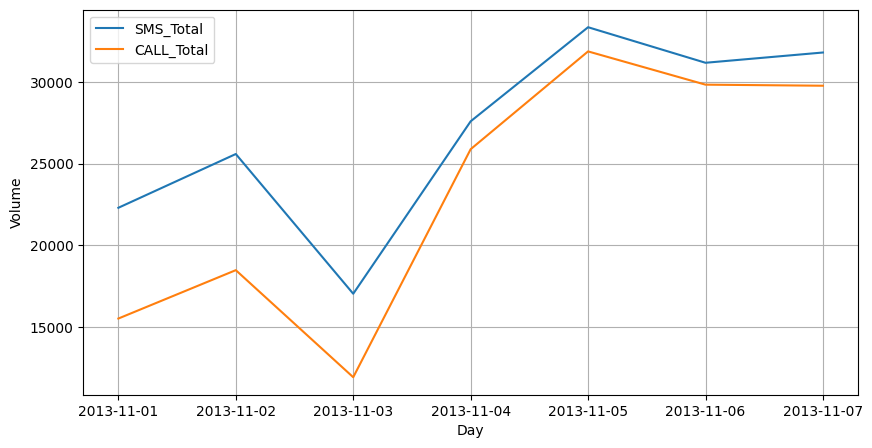

In [51]:
fig, ax = plt.subplots(figsize=(10, 5))

for column in data_5059.columns:
    data_5059[column].plot(ax=ax, label=column)

ax.grid()
ax.set_xlabel("Day")
ax.set_ylabel("Volume")
ax.legend()

plt.show()


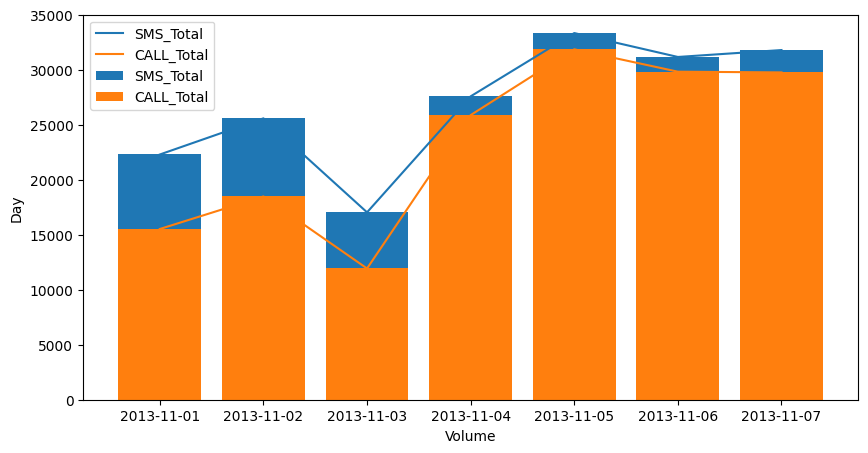

In [52]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))


for column in data_5059.columns:
    data_5059[column].plot(ax=ax, label=column)
    ax.bar(data_5059.index, data_5059[column], label=column)


ax.set_xlabel("Volume")
ax.set_ylabel("Day")
ax.legend()

plt.show()

### Geographical visualization of 10000 grids from the geojson file

In [ ]:
import folium
import geopandas as gpd

# Read the GeoJSON file into a GeoDataFrame
milan = gpd.read_file('C:\\Users\\a.abdallah\\Downloads\\milano-grid.geojson')

# Create a map centered on Milan
m = folium.Map(location=[45.4642, 9.1900], zoom_start=12)

# Add the GeoDataFrame as a GeoJSON layer
folium.GeoJson(milan).add_to(m)

# Display the map
m





In [ ]:
import geopandas as gpd
import folium

# Read the GeoJSON file into a GeoDataFrame
milan = gpd.read_file('C:\\Users\\a.abdallah\\Downloads\\milano-grid.geojson')

# Create a map centered on Milan

# Create a map centered on Milan
m = folium.Map(location=[45.4642, 9.1900], zoom_start=12)

# Add the GeoDataFrame as a GeoJSON layer, with popup information for each cellId
folium.GeoJson(milan, name='geojson', tooltip=folium.features.GeoJsonTooltip(fields=['cellId'], labels=True, sticky=False)).add_to(m)

# Add layer control to the map
folium.LayerControl().add_to(m)

# Display the map
m


In [ ]:
milan.columns

### Fetch the top 10 grids from the sorted grids and display them

In [ ]:

SMS_by_grid = group_by_grid[['SMS_Total']].sort_values(by = 'SMS_Total' , ascending = False)
CALL_by_grid = group_by_grid[['CALL_Total']].sort_values(by = 'CALL_Total' , ascending = False)
INTERNET_by_grid = group_by_grid[['internet']].sort_values(by = 'internet' , ascending = False)

SMS_by_grid

### top 10 volume for SMS,CALL and Internet activity and its gridID

In [ ]:

top10 = pd.DataFrame()

top10['sms'] = SMS_by_grid[:10].index.values
top10['call'] = CALL_by_grid[:10].index.values
top10['internet'] = INTERNET_by_grid[:10].index.values
top10

### Mapping top Grids with real geographic locations

In [ ]:
import geopandas as gpd
import geojsonio as gj

#reading file geojson
milan = gpd.read_file('C:\\Users\\a.abdallah\\Downloads\\milano-grid.geojson')

#get unique values across all the columns in dataframe top10
topgrids = pd.unique(top10.values.ravel())

#New browser opens with the top 10 grids
topGridgeojson = milan.loc[milan['cellId'].isin(topgrids)]
topGridgeojson = topGridgeojson.to_json()
_ = gj.display(topGridgeojson)

![title](images/TopGrids.png)

### group the data by grid , day and hour

In [37]:
group_by_grid_by_day_by_hour = group_by(data,['gridID','Date','hour'],{'countryCode'})

 #Group data by gridID and Time

group_by_grid_by_day_by_hour

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15508\858627787.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data_name.groupby(column).sum()


smsIn    smsOut     callIn    callOut    internet
gridID Date       hour                                                       
1      2013-11-01 0      2.084285  1.104749   0.591930   0.429290   57.799009
                  1      1.163624  0.770031   0.190564   0.194139   44.046899
                  2      0.415579  0.300391   0.027925   0.135964   41.207149
                  3      1.152067  0.895724   0.001787   0.026137   33.022070
                  4      0.354453  0.511192   0.005362   0.026137   31.376930
...                           ...       ...        ...        ...         ...
10000  2013-11-07 19    13.661210  7.526233  11.394525  13.302567  160.847694
                  20    10.930428  3.721888   8.434177   9.673581  170.171584
                  21    10.459571  5.999650   5.371544   5.481134  168.641915
                  22     9.440923  7.578513   1.780944   3.041064  142.807433
                  23     4.912718  2.929960   2.726909   0.938437  135.723164

[1679994 rows x 5 columns]

### List contains the day 

In [38]:
unique_dates = group_by_grid_by_day_by_hour.index.get_level_values('Date').unique().tolist()
unique_dates
#unique_dates = group_by_grid_by_day_by_hour['Date'].unique().tolist()


[datetime.date(2013, 11, 1),
 datetime.date(2013, 11, 2),
 datetime.date(2013, 11, 3),
 datetime.date(2013, 11, 4),
 datetime.date(2013, 11, 5),
 datetime.date(2013, 11, 6),
 datetime.date(2013, 11, 7)]

### Plot the activity of smsin , smsout, callin, callout in gridid = 5059 on each day

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15508\91828016.py:5: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  _5059 = group_by_grid_by_day_by_hour.loc[5059,pd.Timestamp(date)][['smsIn','smsOut','callIn','callOut']]


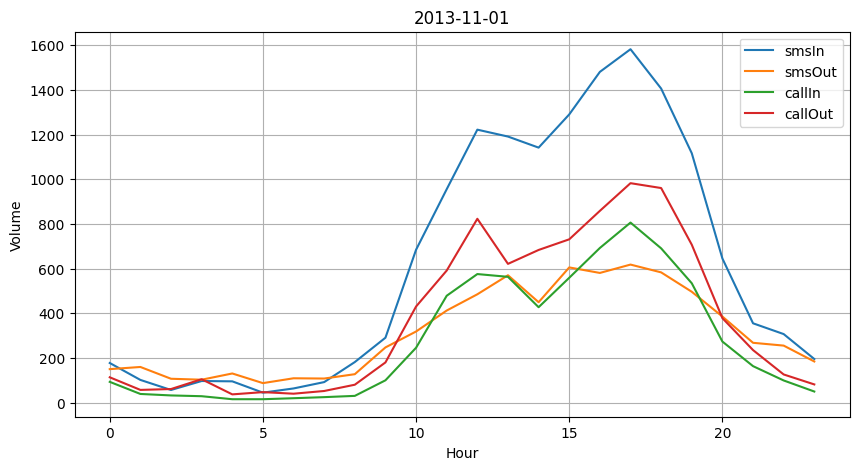

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15508\91828016.py:5: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  _5059 = group_by_grid_by_day_by_hour.loc[5059,pd.Timestamp(date)][['smsIn','smsOut','callIn','callOut']]


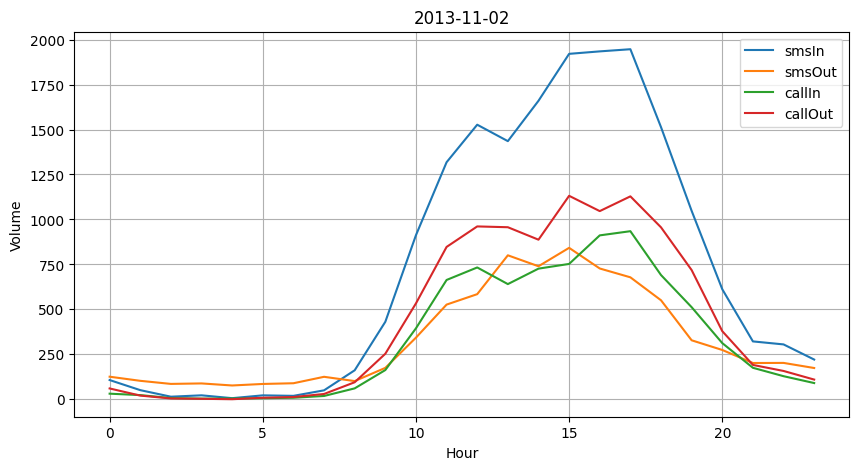

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15508\91828016.py:5: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  _5059 = group_by_grid_by_day_by_hour.loc[5059,pd.Timestamp(date)][['smsIn','smsOut','callIn','callOut']]


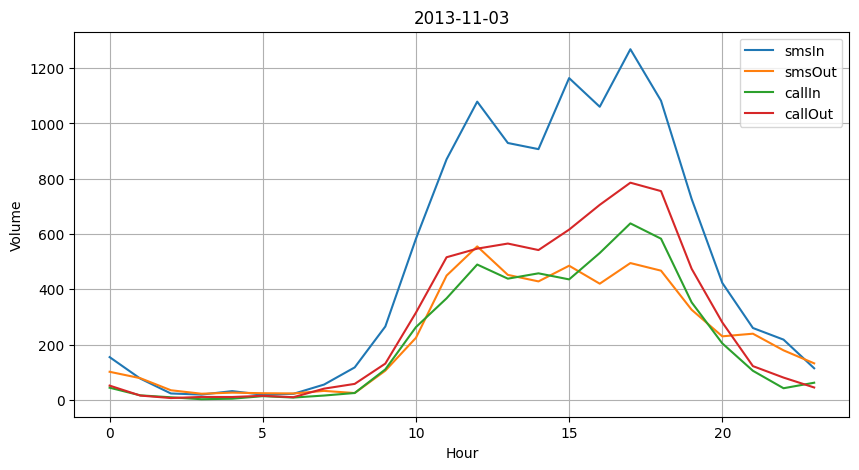

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15508\91828016.py:5: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  _5059 = group_by_grid_by_day_by_hour.loc[5059,pd.Timestamp(date)][['smsIn','smsOut','callIn','callOut']]


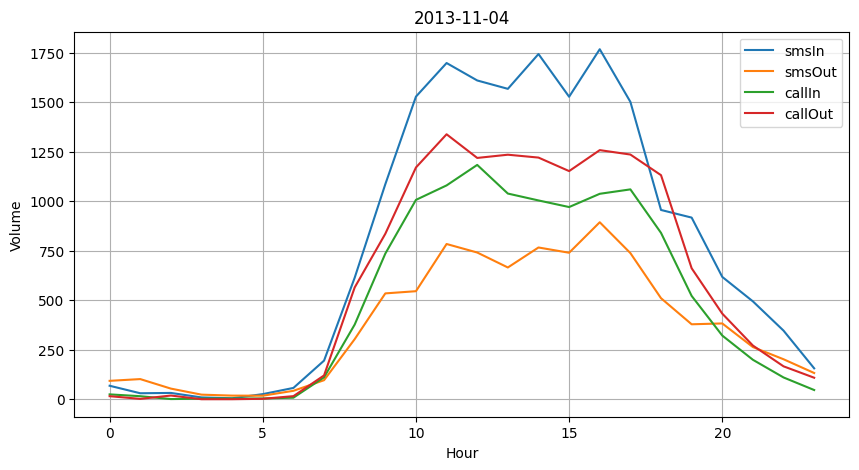

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15508\91828016.py:5: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  _5059 = group_by_grid_by_day_by_hour.loc[5059,pd.Timestamp(date)][['smsIn','smsOut','callIn','callOut']]


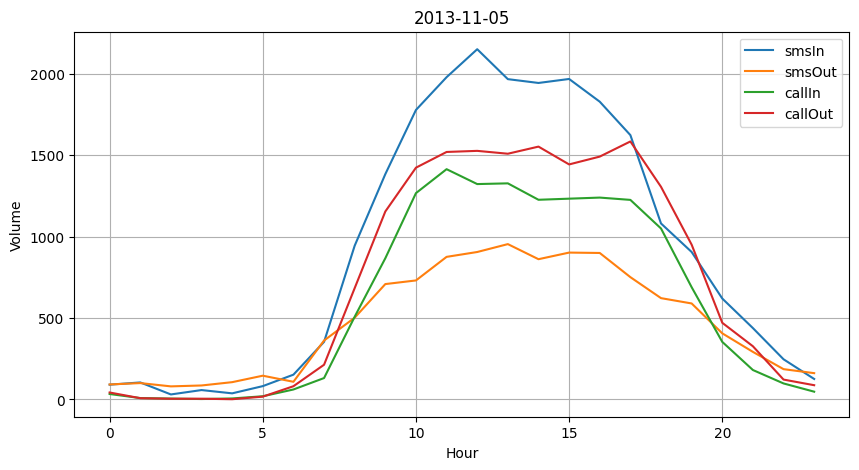

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15508\91828016.py:5: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  _5059 = group_by_grid_by_day_by_hour.loc[5059,pd.Timestamp(date)][['smsIn','smsOut','callIn','callOut']]


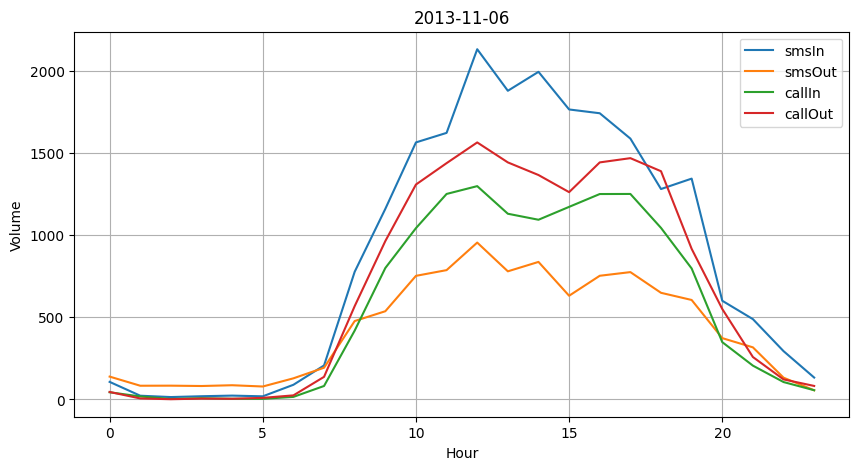

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15508\91828016.py:5: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  _5059 = group_by_grid_by_day_by_hour.loc[5059,pd.Timestamp(date)][['smsIn','smsOut','callIn','callOut']]


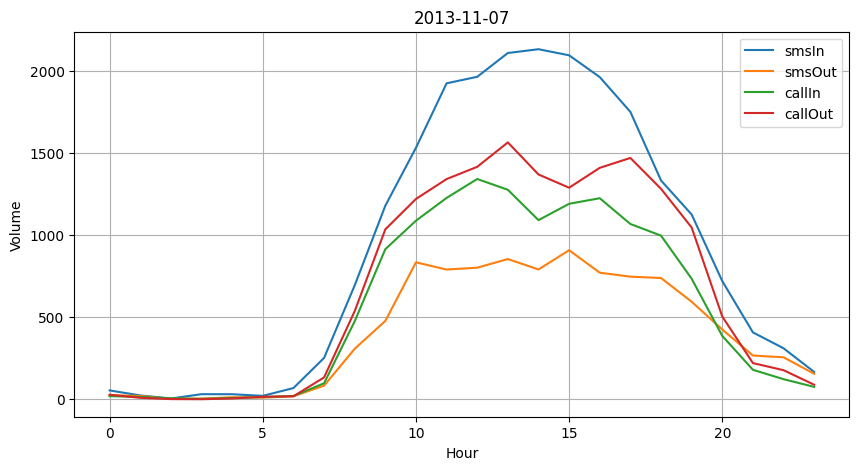

In [42]:
#2013-11-01  is being interpreted as a column name , which does not exist in your group_by_grid_by_day_by_hour , 
# so to fixe it i can use  pd.Timestamp to convert the string '2013-11-01' to a pandas Timestamp object:

for date in unique_dates:
    _5059 = group_by_grid_by_day_by_hour.loc[5059,pd.Timestamp(date)][['smsIn','smsOut','callIn','callOut']]
    fig, ax = plt.subplots(figsize=(10, 5))
    for column in _5059.columns:
        _5059[column].plot(ax=ax, label=column)
   
    ax.grid()
    
    ax.set_title(date)
    ax.set_xlabel("Hour")
    ax.set_ylabel("Volume")
    ax.legend()

    plt.show()
    



C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15508\1301341988.py:12: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  _5059 = group_by_grid_by_day_by_hour.loc[5059, pd.Timestamp(date)][['smsIn','smsOut','callIn','callOut']]
C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15508\1301341988.py:12: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  _5059 = group_by_grid_by_day_by_hour.loc[5059, pd.Timestamp(date)][['smsIn','smsOut','callIn','callOut']]
C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15508\1301341988.py:12: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in 

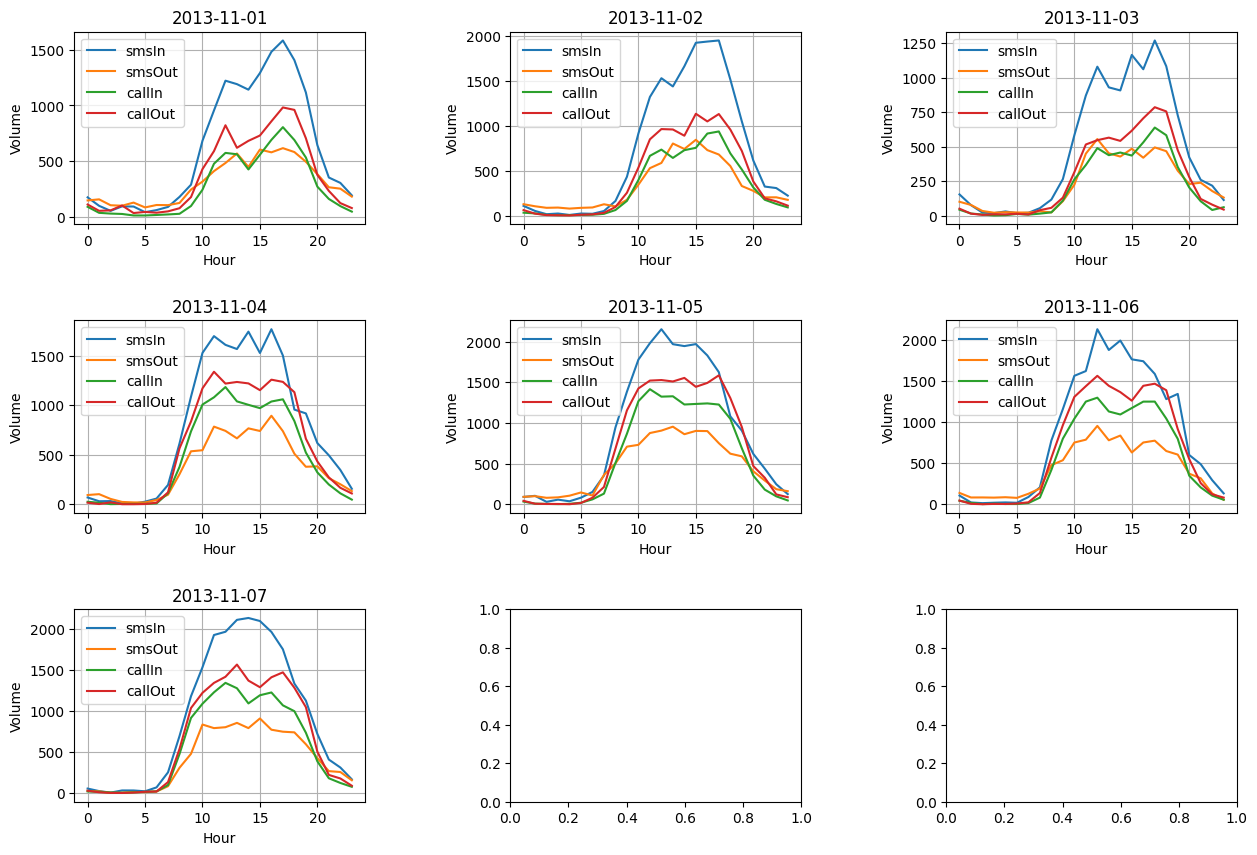

'\n# Define number of rows and columns for subplot grid\nnrows = 3\nncols = 3\n\n# Create subplot grid\nfig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))\n\n# Loop over unique dates and plot data for each date\nfor i, date in enumerate(unique_dates):\n    \n    # Get data for specific grid and date\n    _5059 = group_by_grid_by_day_by_hour.loc[5059, pd.Timestamp(date)][[\'smsIn\',\'smsOut\',\'callIn\',\'callOut\']]\n    \n    # Determine row and column index for subplot\n    row = i // ncols\n    col = i % ncols\n    \n    # Select subplot and plot data\n    ax[row, col].plot(_5059[\'smsIn\'], label=\'smsIn\')\n    ax[row, col].plot(_5059[\'smsOut\'], label=\'smsOut\')\n    ax[row, col].plot(_5059[\'callIn\'], label=\'callIn\')\n    ax[row, col].plot(_5059[\'callOut\'], label=\'callOut\')\n    ax[row, col].grid()\n    ax[row, col].set_xlabel("Hour")\n    ax[row, col].set_ylabel("Volume")\n    ax[row, col].set_title(date)\n    ax[row, col].legend()\n\n# Adjust spacing b

In [43]:

# Define number of rows and columns for subplot grid
nrows = 3
ncols = 3

# Create subplot grid
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

# Loop over unique dates and plot data for each date
for i, date in enumerate(unique_dates):
    
    # Get data for specific grid and date
    _5059 = group_by_grid_by_day_by_hour.loc[5059, pd.Timestamp(date)][['smsIn','smsOut','callIn','callOut']]
    
    # Determine row and column index for subplot
    row = i // ncols
    col = i % ncols
    
    for column in _5059.columns:
    # Select subplot and plot data
        ax[row, col].plot(_5059[column], label=column)
        '''
              ax[row, col].plot(_5059['smsIn'], label='smsIn')
        ax[row, col].plot(_5059['smsOut'], label='smsOut')
        ax[row, col].plot(_5059['callIn'], label='callIn')
        ax[row, col].plot(_5059['callOut'], label='callOut')
        '''
        
    ax[row, col].grid()
    ax[row, col].set_xlabel("Hour")
    ax[row, col].set_ylabel("Volume")
    ax[row, col].set_title(date)
    ax[row, col].legend()

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Show plot
plt.show()
'''
# Define number of rows and columns for subplot grid
nrows = 3
ncols = 3

# Create subplot grid
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

# Loop over unique dates and plot data for each date
for i, date in enumerate(unique_dates):
    
    # Get data for specific grid and date
    _5059 = group_by_grid_by_day_by_hour.loc[5059, pd.Timestamp(date)][['smsIn','smsOut','callIn','callOut']]
    
    # Determine row and column index for subplot
    row = i // ncols
    col = i % ncols
    
    # Select subplot and plot data
    ax[row, col].plot(_5059['smsIn'], label='smsIn')
    ax[row, col].plot(_5059['smsOut'], label='smsOut')
    ax[row, col].plot(_5059['callIn'], label='callIn')
    ax[row, col].plot(_5059['callOut'], label='callOut')
    ax[row, col].grid()
    ax[row, col].set_xlabel("Hour")
    ax[row, col].set_ylabel("Volume")
    ax[row, col].set_title(date)
    ax[row, col].legend()

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Show plot
plt.show()
-------------------------------------------------------------
'''


### Plot the activity of smsin , smsout, callin, callout in gridid = 5059 on each day

In [ ]:

# Define number of rows and columns for subplot grid
nrows = 3
ncols = 3

# Create subplot grid
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

# Loop over unique dates and plot data for each date
for i, date in enumerate(unique_dates[:nrows*ncols]):
    
    # Get data for specific grid and date
    _5163 = group_by_grid_by_day_by_hour.loc[5163, pd.Timestamp(date)][['smsIn','smsOut','callIn','callOut']]
    
    # Determine row and column index for subplot
    row = i // ncols
    col = i % ncols
    
    
        
    for column in _5163.columns:
    # Select subplot and plot data
        ax[row, col].plot(_5163[column], label=column)
    
    ax[row, col].grid()
    ax[row, col].set_xlabel("Hour")
    ax[row, col].set_ylabel("Volume")
    ax[row, col].set_title(date)
    ax[row, col].legend()

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Show plot
plt.show()


In [ ]:


group_by_countrycode = pd.DataFrame()

 #Group data by gridID and Time
group_by_countrycode  = data1.groupby([ 'countryCode']).sum()

group_by_countrycode.drop(columns={'hour','gridID' },inplace=True)


group_by_countrycode 

In [ ]:
top10=group_by_countrycode[1:10].sort_values(by = 'SMS_Total',ascending=False)
top10


In [ ]:




#Create new dataFrame name data grid contains only the total sms and call for each grid

ax =top10.plot(kind='bar', figsize=(10,5))

ax.set_xlabel("Internet Volume")
ax.set_ylabel(" gridId")




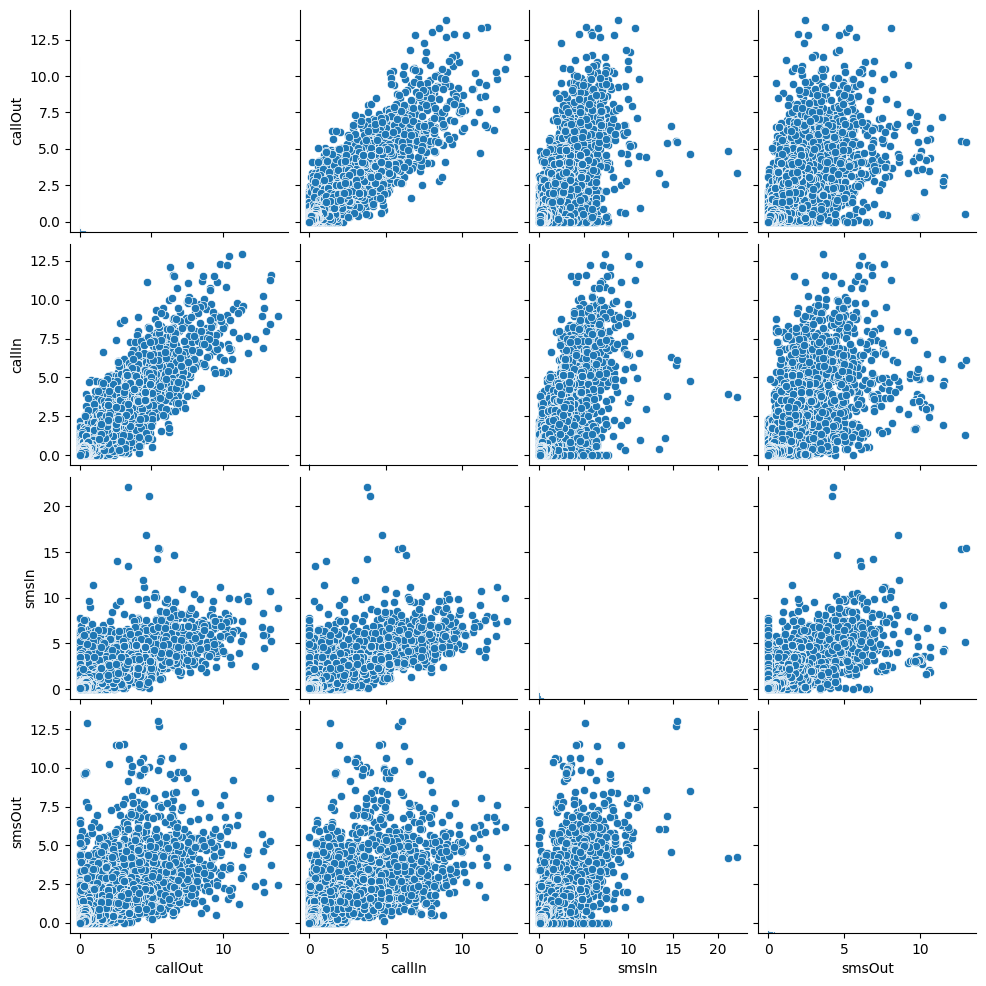

In [58]:
import seaborn as sns
sns.pairplot(data[['callOut','callIn','smsIn','smsOut']][:100000])


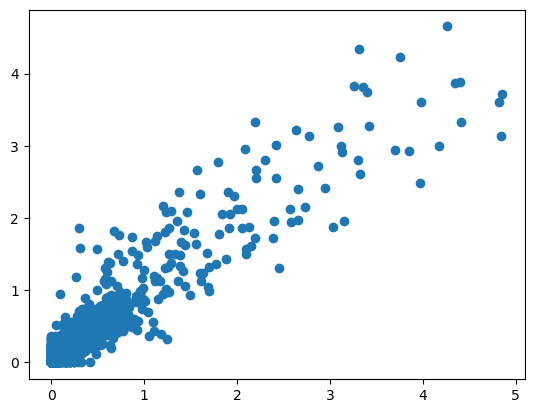

In [62]:
plt.scatter(data['callIn'][:10000],data['callOut'][:10000])#,c=data['hour'][:10000],cmap="summer"
#plt.xscale('log')
#plt.yscale('log')
#plt.colorbar()

In [59]:
group_by_grid_by_hour = group_by(data,['gridID','hour'],{'countryCode'})

group_by_grid_by_hour

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15508\858627787.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data_name.groupby(column).sum()


smsIn     smsOut     callIn    callOut     internet
gridID hour                                                         
1      0     10.385189   7.477040   1.879054   2.182518   373.890267
       1      8.168210   6.298813   0.574191   0.515391   314.858006
       2      4.065845   3.244873   0.201288   0.198338   278.052830
       3      2.503390   1.719194   0.136588   0.220277   236.012492
       4      2.176409   1.615268   0.112862   0.084313   219.483874
...                ...        ...        ...        ...          ...
10000  19    91.201182  49.122058  68.825546  75.686769  1004.597208
       20    80.812011  51.411066  54.248321  57.844488  1011.144572
       21    57.398471  46.110873  31.522683  34.073760   932.732964
       22    38.400195  39.147609  16.424910  17.770865   777.680140
       23    28.766485  28.338961   9.904620   8.918746   843.170556

[240000 rows x 5 columns]

In [63]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#sns.regplot(x=data['smsIn'],y=data['smsOut'])
sns.lmplot(x='callIn',y='callOut',data=data[:1000000])
plt.show()

In [ ]:
id_4259  =data.loc[data['gridID']==4259][['gridID','smsIn','smsOut','callOut','callIn','hour','countryCode']]

id_4259

In [ ]:
id_5059  =data.loc[data['gridID']==5059][['gridID','smsIn','smsOut','callOut','callIn','hour','countryCode']]

id_5059

In [ ]:
plt.scatter(id_5059['callOut'],id_5059['callIn'],c=id_5059['hour'],cmap="summer")
plt.colorbar()


In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
group_by_grid.reset_index(inplace=True)
#group_by_grid.drop(columns={'index'},inplace=True)
group_by_grid

,gridID,internet,SMS_Total,CALL_Total
0,1,10161.346877,972.462400,823.050729
1,2,10206.621484,986.751514,835.800917
2,3,10254.814512,1001.961711,849.372988
3,4,10030.208162,931.073724,786.119580
4,5,9155.531808,867.856045,735.981329
...,...,...,...,...
9995,9996,37581.639821,3183.956405,3024.765487
9996,9997,41170.661609,3441.599035,3288.669089
9997,9998,40483.931843,3383.343540,3230.625098
9998,9999,25507.146794,2373.544933,2293.019995


In [66]:
group_by_grid_by_day.reset_index(inplace=True)
group_by_grid_by_day

,gridID,Date,internet,SMS_Total,CALL_Total
0,1,2013-11-01,1507.048349,124.596325,89.353945
1,1,2013-11-02,1515.641856,130.291756,101.481653
2,1,2013-11-03,1533.148425,123.175072,77.051861
3,1,2013-11-04,1404.813593,159.614824,138.297882
4,1,2013-11-05,1518.090111,144.032134,139.501434
...,...,...,...,...,...
69995,10000,2013-11-03,2716.099257,268.427403,190.423018
69996,10000,2013-11-04,3069.209086,354.254727,383.135633
69997,10000,2013-11-05,2881.612204,359.679285,384.331729
69998,10000,2013-11-06,2971.410253,361.879012,393.260134


C:\Users\a.abdallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\a.abdallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\a.abdallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\a.abdallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

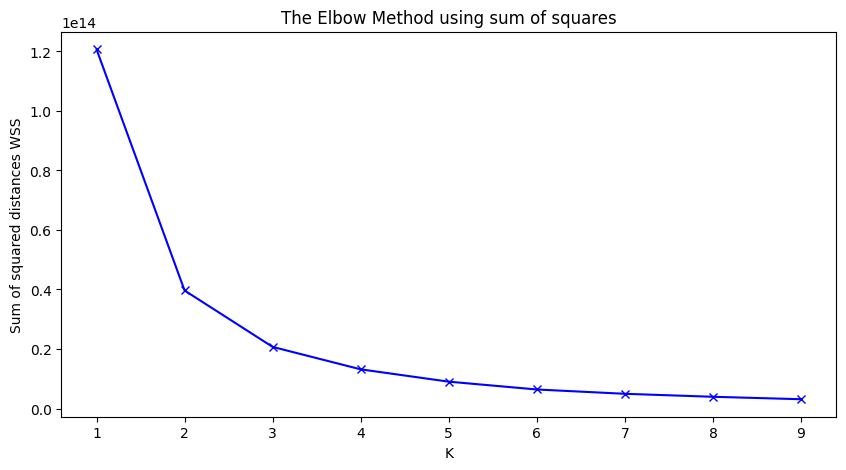

In [67]:
SS=[]
for i in range(1,10):
    model = KMeans(n_clusters=i, init='k-means++',random_state=40)
    model.fit(group_by_grid)
    #Attribute inertia_ gives sum of squared distances of samples to their closest cluster center
    SS.append(model.inertia_)
    
plt.figure(figsize=(10,5))
plt.plot(range(1,10), SS, 'bx-') 

plt.xlabel('K') 
plt.ylabel('Sum of squared distances WSS') 
plt.title('The Elbow Method using sum of squares')
plt.show()



In [68]:

group_by_grid2 = group_by(data,['gridID'],{'countryCode','hour'})
group_by_grid2.reset_index(inplace=True)
group_by_grid2 



C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15508\858627787.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data_name.groupby(column).sum()


,gridID,smsIn,smsOut,callIn,callOut,internet
0,1,639.261690,333.200710,398.110222,424.940507,10161.346877
1,2,649.052684,337.698831,404.025526,431.775391,10206.621484
2,3,659.474809,342.486902,410.322132,439.050855,10254.814512
3,4,610.901901,320.171823,380.976439,405.143141,10030.208162
4,5,569.583077,298.272968,356.464539,379.516790,9155.531808
...,...,...,...,...,...,...
9995,9996,2068.397167,1115.559238,1425.650976,1599.114511,37581.639821
9996,9997,2272.280097,1169.318937,1542.878171,1745.790918,41170.661609
9997,9998,2227.572293,1155.771247,1517.018822,1713.606276,40483.931843
9998,9999,1503.258386,870.286547,1089.763279,1203.256716,25507.146794


In [69]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(group_by_grid2)
y_pred

C:\Users\a.abdallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [70]:
centroids = km.cluster_centers_

In [71]:
df_cluster = group_by_grid2.copy()
df_cluster['df_cluster'] = km.labels_
df_cluster['df_cluster'].unique()

array([0, 2, 1])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


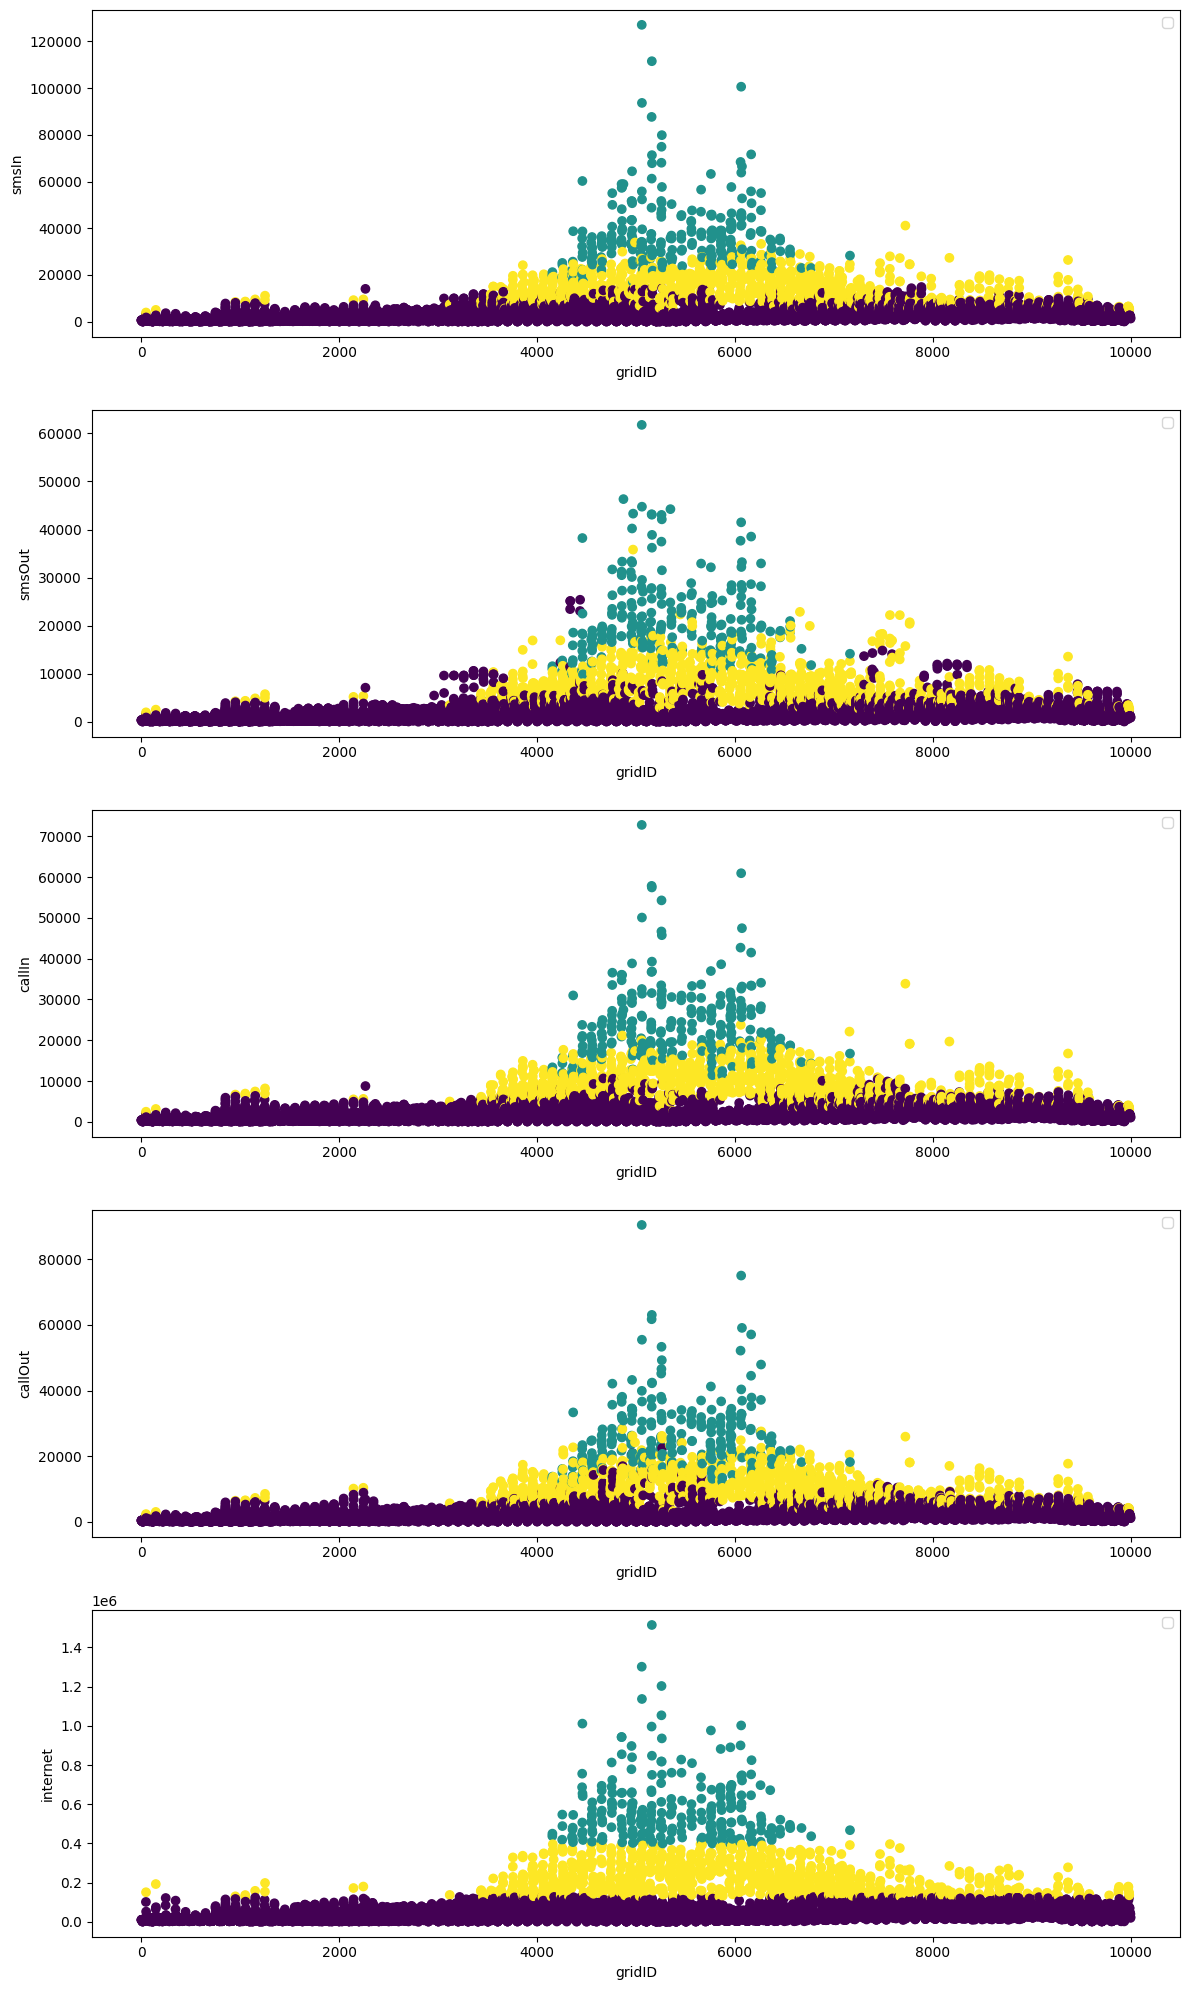

In [72]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(12, 20))
Color=['blue','gold','vert']
df_cluster['Color'] = df_cluster['df_cluster'].map(lambda p:Color[p])
for idx,column in enumerate(group_by_grid2.columns[1:]):
    axs[idx].scatter(group_by_grid2['gridID'],group_by_grid2[column],c=df_cluster['df_cluster'])
  
    axs[idx].set_xlabel("gridID")
    axs[idx].set_ylabel(column)
    axs[idx].legend()
   


plt.tight_layout()
plt.show()







In [82]:
#group_by_hour.reset_index(inplace=True)
group_by_hour

,hour,smsIn,smsOut,callIn,callOut,internet
0,0,6.052820e+05,5.555044e+05,1.797632e+05,2.290948e+05,2.348885e+07
1,1,3.139912e+05,3.324220e+05,8.976319e+04,1.228706e+05,1.956353e+07
2,2,1.928273e+05,2.414595e+05,5.394730e+04,8.120553e+04,1.686377e+07
3,3,1.379072e+05,2.056120e+05,3.847290e+04,6.822410e+04,1.506482e+07
4,4,1.185341e+05,1.902678e+05,3.801372e+04,6.564112e+04,1.402213e+07
5,5,1.312604e+05,1.992546e+05,4.776854e+04,7.641638e+04,1.388156e+07
6,6,2.602220e+05,3.028265e+05,1.089364e+05,1.567041e+05,1.561721e+07
7,7,8.258802e+05,7.097681e+05,4.266653e+05,5.506025e+05,2.154565e+07
8,8,2.519444e+06,1.187291e+06,1.193614e+06,1.444437e+06,2.816011e+07
9,9,3.017389e+06,1.425104e+06,1.961353e+06,2.315310e+06,3.173844e+07


In [83]:
SS=[]
for i in range(1,10):
    model = KMeans(n_clusters=i,random_state=40)
    model.fit(group_by_hour)
    #Attribute inertia_ gives sum of squared distances of samples to their closest cluster center
    SS.append(model.inertia_)

C:\Users\a.abdallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\a.abdallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\a.abdallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\a.abdallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

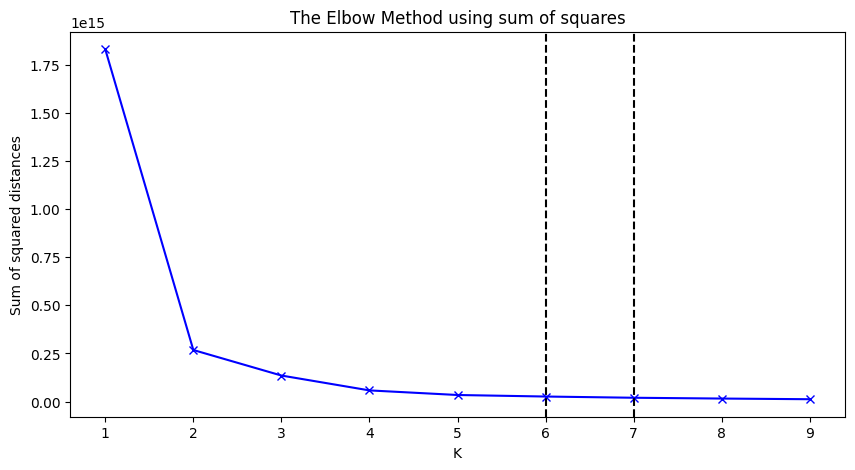

In [84]:
    
K = [i for i in range(1,10)]
plt.figure(figsize=(10,5))
plt.plot(K, SS, 'bx-') 
plt.axvline(6, color='black', ls='dashed')
plt.axvline(7, color='black', ls='dashed')
plt.xlabel('K') 
plt.ylabel('Sum of squared distances') 
plt.title('The Elbow Method using sum of squares')
plt.show()

In [85]:
km = KMeans(n_clusters=2)
y_pred = km.fit_predict(group_by_hour)
y_pred

C:\Users\a.abdallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [86]:
df_cluster = group_by_hour.copy()
df_cluster['df_cluster'] = km.labels_
df_cluster['df_cluster'].unique()

array([1, 0])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


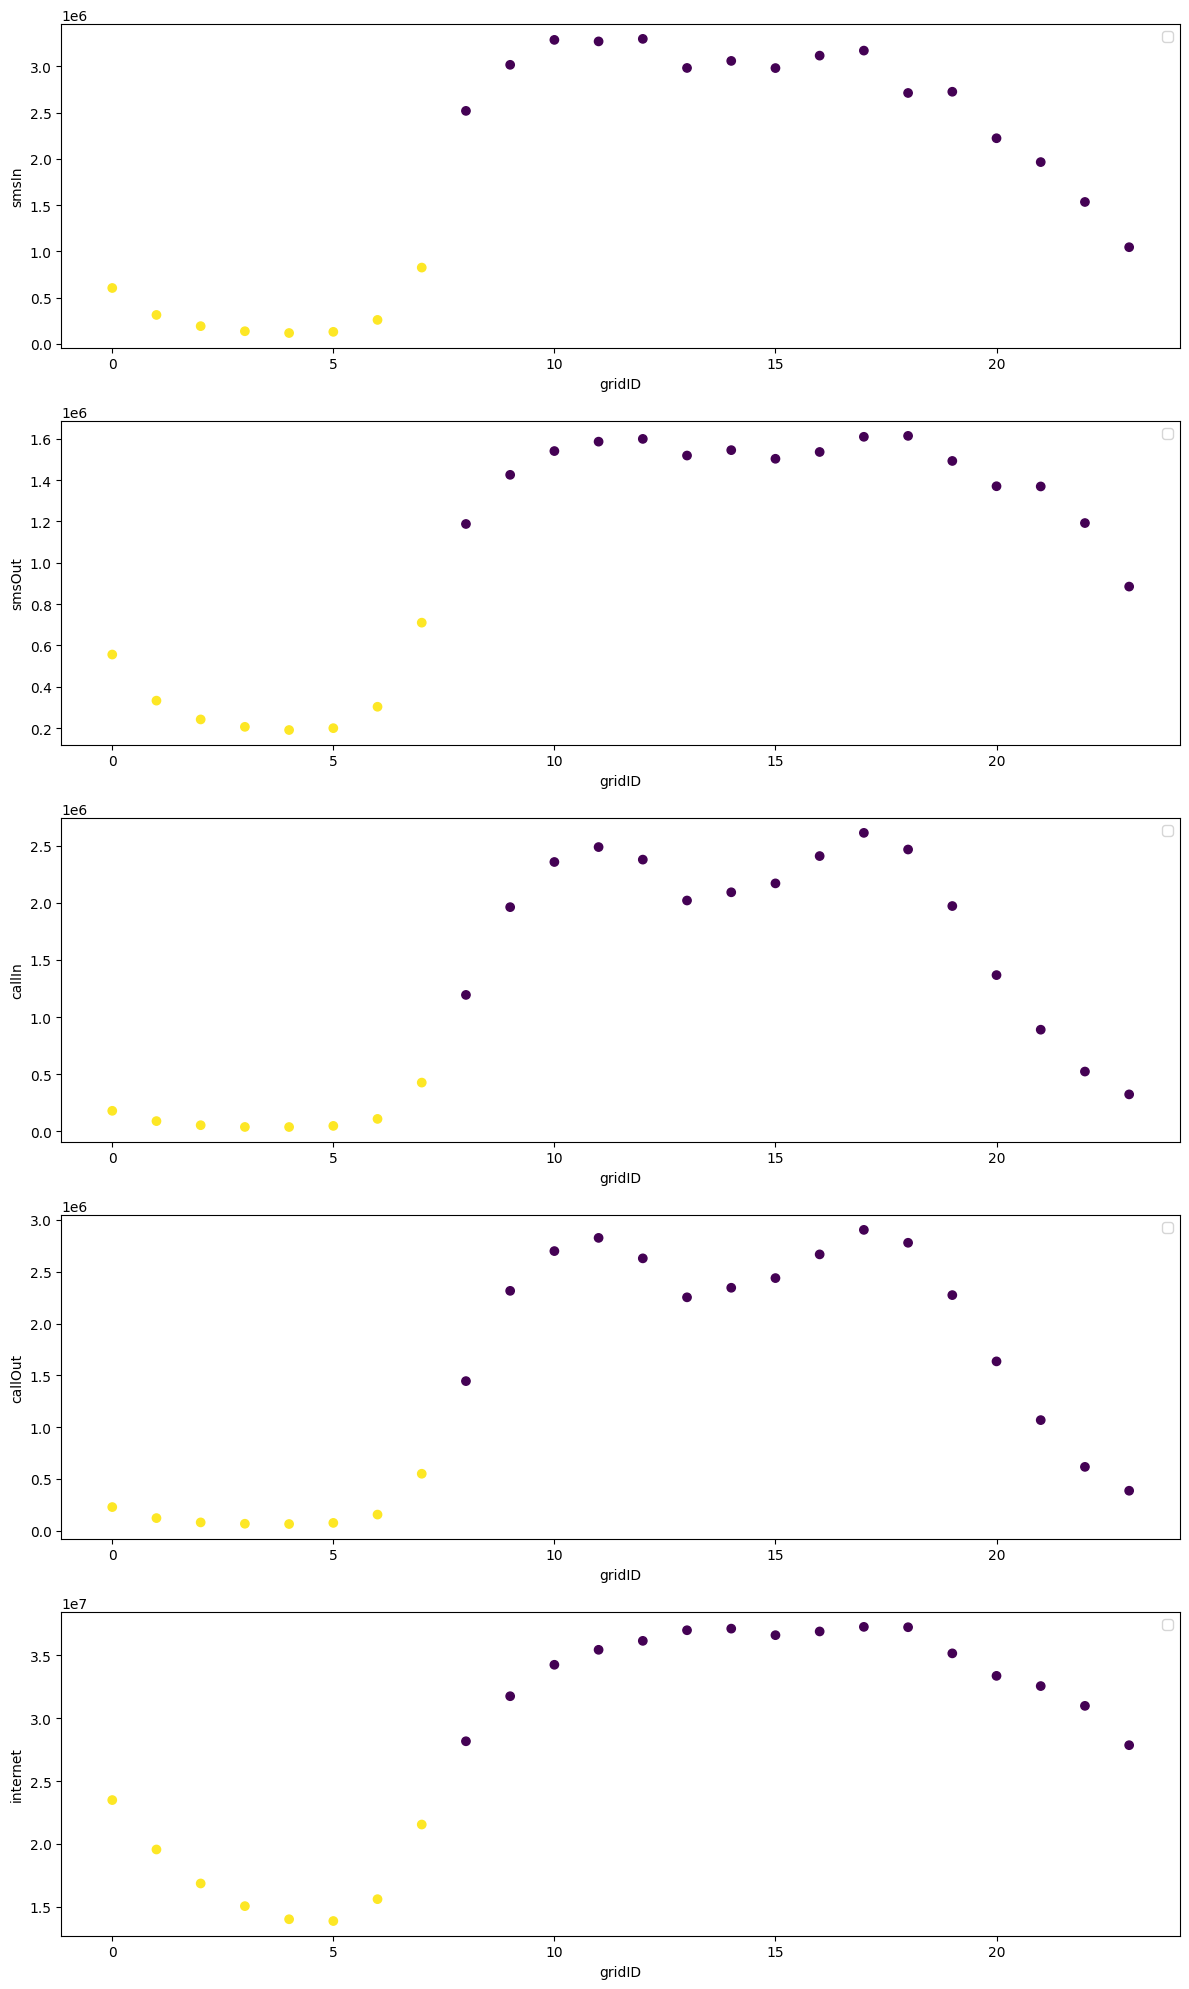

In [87]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(12, 20))
Color=['blue','gold','vert']
df_cluster['Color'] = df_cluster['df_cluster'].map(lambda p:Color[p])
for idx,column in enumerate(group_by_hour.columns[1:]):
    axs[idx].scatter(group_by_hour['hour'],group_by_hour[column],c=df_cluster['df_cluster'])
  
    axs[idx].set_xlabel("gridID")
    axs[idx].set_ylabel(column)
    axs[idx].legend()
   

plt.tight_layout()
plt.show()







In [1]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


C:\Users\a.abdallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\a.abdallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\a.abdallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\a.abdallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

<bound method Visualizer.show of KElbowVisualizer(ax=<AxesSubplot: >, estimator=KMeans(n_clusters=9), k=(1, 10),
                 timings=False)>

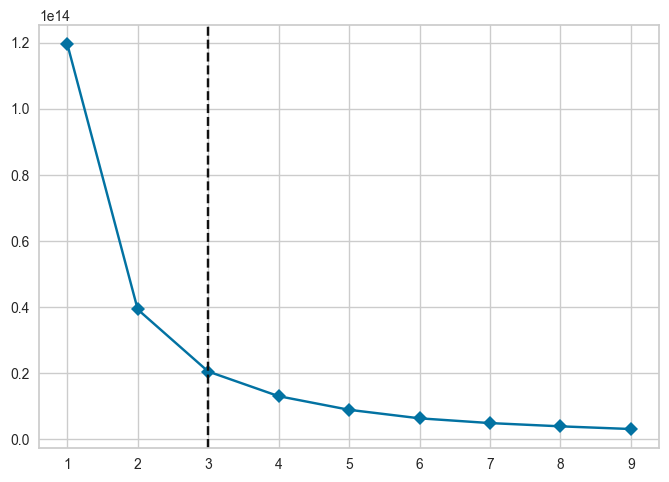

In [16]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model , k=(1,10) , timings = False)
visualizer.fit(group_by_grid2)
visualizer.show